In [ ]:
import warnings
# Hilangkan peringatan
warnings.filterwarnings("ignore")


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_riau = data[data['Kota/Kabupaten'] == 'Riau']

# Convert 'Date' to datetime and set it as index
data_riau['Date'] = pd.to_datetime(data_riau['Date'])
data_riau.set_index('Date', inplace=True)

# Define your time series data
ts = data_riau['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 3)  # p from 0 to 8
d = 1  # fixed differencing order
q_values = range(0, 3)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 3)  # P from 0 to 5
D = 1  # fixed seasonal differencing order
Q_values = range(0, 3)  # Q from 0 to 5
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((true_values - pred_values) / true_values)) * 100
    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': mape_arima
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': mape_sarima
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results.xlsx', index=False)


<ipython-input-5-3e25fc1c0098>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_riau['Date'] = pd.to_datetime(data_riau['Date'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/l

                       Model         AIC  Ljung-Box p-value       MAE  \
0               ARIMA(0,1,0)  903.476235       5.641552e-15  1.291581   
1               ARIMA(0,1,1)  695.522962       1.720452e-12  0.840475   
2               ARIMA(0,1,2)  630.444889       3.132867e-22  0.721797   
3               ARIMA(1,1,0)  822.716346       6.048404e-15  1.088791   
4               ARIMA(1,1,1)  683.913732       8.885988e-22  0.814481   
..                       ...         ...                ...       ...   
85  SARIMA(1,1,1)x(2,1,2,12)  544.523333       8.555922e-05  0.664597   
86  SARIMA(1,1,2)x(2,1,2,12)  491.396554       1.118697e-01  0.598128   
87  SARIMA(2,1,0)x(2,1,2,12)  643.207357       4.149550e-08  0.800989   
88  SARIMA(2,1,1)x(2,1,2,12)  511.179290       4.948573e-03  0.630689   
89  SARIMA(2,1,2)x(2,1,2,12)  493.391772       1.166635e-01  0.598212   

         MSE      RMSE        MAPE  
0   2.579972  1.606229  332.173699  
1   1.070003  1.034410  102.338658  
2   0.808439

In [ ]:
results_df

,Model,AIC,Ljung-Box p-value,MAE,MSE,RMSE,MAPE
0,"ARIMA(0,1,0)",903.476235,5.641552e-15,1.291581,2.579972,1.606229,332.173699
1,"ARIMA(0,1,1)",695.522962,1.720452e-12,0.840475,1.070003,1.034410,102.338658
2,"ARIMA(0,1,2)",630.444889,3.132867e-22,0.721797,0.808439,0.899132,206.979436
3,"ARIMA(1,1,0)",822.716346,6.048404e-15,1.088791,1.822159,1.349874,227.352697
4,"ARIMA(1,1,1)",683.913732,8.885988e-22,0.814481,1.010748,1.005360,133.834230
...,...,...,...,...,...,...,...
85,"SARIMA(1,1,1)x(2,1,2,12)",544.523333,8.555922e-05,0.664597,0.741275,0.860973,234.617990
86,"SARIMA(1,1,2)x(2,1,2,12)",491.396554,1.118697e-01,0.598128,0.615485,0.784528,215.856072
87,"SARIMA(2,1,0)x(2,1,2,12)",643.207357,4.149550e-08,0.800989,1.053711,1.026504,265.343468
88,"SARIMA(2,1,1)x(2,1,2,12)",511.179290,4.948573e-03,0.630689,0.656720,0.810383,217.888047


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_riau = data[data['Kota/Kabupaten'] == 'Riau']

# Convert 'Date' to datetime and set it as index
data_riau['Date'] = pd.to_datetime(data_riau['Date'])
data_riau.set_index('Date', inplace=True)

# Define your time series data
ts = data_riau['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 6)  # p from 0 to 8
d = 1  # fixed differencing order
q_values = range(0, 6)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 5
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 5
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 100
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape


# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE':  f'{mape_sarima} %'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/0-6_0-4_ARIMA_SARIMA_Results.xlsx', index=False)


<ipython-input-7-61628d4d1df7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_riau['Date'] = pd.to_datetime(data_riau['Date'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/l

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_riau = data[data['Kota/Kabupaten'] == 'Riau']

# Convert 'Date' to datetime and set it as index
data_riau['Date'] = pd.to_datetime(data_riau['Date'])
data_riau.set_index('Date', inplace=True)

# Define your time series data
ts = data_riau['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 100
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/0-6_0-4_ARIMA_SARIMA_Results.xlsx', index=False)


<ipython-input-9-601d54107ba7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_riau['Date'] = pd.to_datetime(data_riau['Date'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/l

                        Model         AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  903.476235       5.641552e-15  1.291581   
1                ARIMA(0,1,1)  695.522962       1.720452e-12  0.840475   
2                ARIMA(0,1,2)  630.444889       3.132867e-22  0.721797   
3                ARIMA(0,1,3)  609.765548       9.598027e-10  0.677523   
4                ARIMA(1,1,0)  822.716346       6.048404e-15  1.088791   
..                        ...         ...                ...       ...   
267  SARIMA(2,1,3)x(3,1,3,12)  498.813989       8.639916e-02  0.606570   
268  SARIMA(3,1,0)x(3,1,3,12)  600.162961       2.992382e-04  0.718134   
269  SARIMA(3,1,1)x(3,1,3,12)  511.412799       4.920863e-02  0.624554   
270  SARIMA(3,1,2)x(3,1,3,12)  517.591566       3.752252e-03  0.629219   
271  SARIMA(3,1,3)x(3,1,3,12)  503.466423       1.144173e-01  0.602498   

          MSE      RMSE     MAPE  
0    2.579972  1.606229  332.17%  
1    1.070003  1.034410  102.34%  
2    0

In [ ]:
results_df

,Model,AIC,Ljung-Box p-value,MAE,MSE,RMSE,MAPE
0,"ARIMA(0,1,0)",903.476235,5.641552e-15,1.291581,2.579972,1.606229,332.17%
1,"ARIMA(0,1,1)",695.522962,1.720452e-12,0.840475,1.070003,1.034410,102.34%
2,"ARIMA(0,1,2)",630.444889,3.132867e-22,0.721797,0.808439,0.899132,206.98%
3,"ARIMA(0,1,3)",609.765548,9.598027e-10,0.677523,0.737545,0.858804,163.17%
4,"ARIMA(1,1,0)",822.716346,6.048404e-15,1.088791,1.822159,1.349874,227.35%
...,...,...,...,...,...,...,...
267,"SARIMA(2,1,3)x(3,1,3,12)",498.813989,8.639916e-02,0.606570,0.613432,0.783219,229.18%
268,"SARIMA(3,1,0)x(3,1,3,12)",600.162961,2.992382e-04,0.718134,0.876675,0.936309,262.16%
269,"SARIMA(3,1,1)x(3,1,3,12)",511.412799,4.920863e-02,0.624554,0.643248,0.802027,224.05%
270,"SARIMA(3,1,2)x(3,1,3,12)",517.591566,3.752252e-03,0.629219,0.652789,0.807954,227.51%


In [ ]:
results_df.head(50)

,Model,AIC,Ljung-Box p-value,MAE,MSE,RMSE,MAPE
0,"ARIMA(0,1,0)",903.476235,5.641552e-15,1.291581,2.579972,1.606229,332.17%
1,"ARIMA(0,1,1)",695.522962,1.720452e-12,0.840475,1.070003,1.034410,102.34%
2,"ARIMA(0,1,2)",630.444889,3.132867e-22,0.721797,0.808439,0.899132,206.98%
3,"ARIMA(0,1,3)",609.765548,9.598027e-10,0.677523,0.737545,0.858804,163.17%
4,"ARIMA(1,1,0)",822.716346,6.048404e-15,1.088791,1.822159,1.349874,227.35%
5,"ARIMA(1,1,1)",683.913732,8.885988e-22,0.814481,1.010748,1.005360,133.83%
6,"ARIMA(1,1,2)",698.265112,3.290938e-12,0.839594,1.064670,1.031828,110.66%
7,"ARIMA(1,1,3)",611.587647,1.193786e-09,0.677125,0.737050,0.858516,162.23%
8,"ARIMA(2,1,0)",799.403032,7.716930e-26,1.027923,1.638206,1.279924,175.95%
9,"ARIMA(2,1,1)",675.835396,4.310663e-23,0.794953,0.969211,0.984485,139.99%


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_riau = data[data['Kota/Kabupaten'] == 'Riau']

# Convert 'Date' to datetime and set it as index
data_riau['Date'] = pd.to_datetime(data_riau['Date'])
data_riau.set_index('Date', inplace=True)

# Define your time series data
ts = data_riau['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 8)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 5)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/0-8_0-4_ARIMA_SARIMA_Results.xlsx', index=False)


<ipython-input-12-c2652f5eabd4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_riau['Date'] = pd.to_datetime(data_riau['Date'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/

                        Model         AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  903.476235       5.641552e-15  1.291581   
1                ARIMA(0,1,1)  695.522962       1.720452e-12  0.840475   
2                ARIMA(0,1,2)  630.444889       3.132867e-22  0.721797   
3                ARIMA(0,1,3)  609.765548       9.598027e-10  0.677523   
4                ARIMA(0,1,4)  611.163936       3.094843e-09  0.677763   
..                        ...         ...                ...       ...   
675  SARIMA(7,1,0)x(3,1,3,12)  543.736890       1.707184e-02  0.648740   
676  SARIMA(7,1,1)x(3,1,3,12)  503.700050       1.033011e-01  0.604050   
677  SARIMA(7,1,2)x(3,1,3,12)  506.176215       9.023197e-02  0.601136   
678  SARIMA(7,1,3)x(3,1,3,12)  506.016638       6.775243e-02  0.605572   
679  SARIMA(7,1,4)x(3,1,3,12)  511.139884       9.351946e-02  0.609133   

          MSE      RMSE   MAPE  
0    2.579972  1.606229  3.32%  
1    1.070003  1.034410  1.02%  
2    0.80843

In [ ]:
results_df.head(50)

,Model,AIC,Ljung-Box p-value,MAE,MSE,RMSE,MAPE
0,"ARIMA(0,1,0)",903.476235,5.641552e-15,1.291581,2.579972,1.606229,3.32%
1,"ARIMA(0,1,1)",695.522962,1.720452e-12,0.840475,1.070003,1.034410,1.02%
2,"ARIMA(0,1,2)",630.444889,3.132867e-22,0.721797,0.808439,0.899132,2.07%
3,"ARIMA(0,1,3)",609.765548,9.598027e-10,0.677523,0.737545,0.858804,1.63%
4,"ARIMA(0,1,4)",611.163936,3.094843e-09,0.677763,0.735768,0.857769,1.62%
5,"ARIMA(1,1,0)",822.716346,6.048404e-15,1.088791,1.822159,1.349874,2.27%
6,"ARIMA(1,1,1)",683.913732,8.885988e-22,0.814481,1.010748,1.005360,1.34%
7,"ARIMA(1,1,2)",698.265112,3.290938e-12,0.839594,1.064670,1.031828,1.11%
8,"ARIMA(1,1,3)",611.587647,1.193786e-09,0.677125,0.737050,0.858516,1.62%
9,"ARIMA(1,1,4)",612.156020,9.372339e-10,0.670718,0.733146,0.856239,1.62%


In [ ]:
# Urutkan berdasarkan nilai AIC terkecil
results_sorted_aic = results_df.sort_values(by='AIC', ascending=True)


# Tampilkan 10 baris pertama dari data yang sudah diurutkan
results_sorted_aic.head(50)

,Model,AIC,Ljung-Box p-value,MAE,MSE,RMSE,MAPE
287,"SARIMA(1,1,2)x(1,1,2,12)",489.824865,0.117042,0.599008,0.616501,0.785176,2.16%
283,"SARIMA(0,1,3)x(1,1,2,12)",490.003043,0.087487,0.598944,0.616990,0.785487,2.15%
282,"SARIMA(0,1,2)x(1,1,2,12)",490.473823,0.009219,0.601689,0.623360,0.789532,2.11%
82,"SARIMA(0,1,2)x(0,1,1,12)",490.835833,0.016785,0.607755,0.630200,0.793851,2.19%
87,"SARIMA(1,1,2)x(0,1,1,12)",490.915798,0.120374,0.606234,0.624759,0.790417,2.28%
83,"SARIMA(0,1,3)x(0,1,1,12)",491.030506,0.097945,0.606273,0.625108,0.790638,2.27%
327,"SARIMA(1,1,2)x(1,1,3,12)",491.368053,0.111586,0.598112,0.615422,0.784488,2.16%
447,"SARIMA(1,1,2)x(2,1,2,12)",491.396554,0.111870,0.598128,0.615485,0.784528,2.16%
284,"SARIMA(0,1,4)x(1,1,2,12)",491.496395,0.167489,0.599032,0.615720,0.784679,2.18%
323,"SARIMA(0,1,3)x(1,1,3,12)",491.530894,0.084664,0.598083,0.615870,0.784774,2.15%


In [ ]:
# Urutkan berdasarkan nilai AIC terkecil
results_sorted_mape = results_df.sort_values(by='MAPE', ascending=True)


# Tampilkan 10 baris pertama dari data yang sudah diurutkan
results_sorted_mape.head(50)

,Model,AIC,Ljung-Box p-value,MAE,MSE,RMSE,MAPE
1,"ARIMA(0,1,1)",695.522962,1.720452e-12,0.840475,1.070003,1.034410,1.02%
7,"ARIMA(1,1,2)",698.265112,3.290938e-12,0.839594,1.064670,1.031828,1.11%
6,"ARIMA(1,1,1)",683.913732,8.885988e-22,0.814481,1.010748,1.005360,1.34%
11,"ARIMA(2,1,1)",675.835396,4.310663e-23,0.794953,0.969211,0.984485,1.40%
17,"ARIMA(3,1,2)",678.440074,4.384568e-23,0.793148,0.963920,0.981794,1.42%
12,"ARIMA(2,1,2)",684.719679,3.919476e-22,0.808962,0.997782,0.998891,1.44%
16,"ARIMA(3,1,1)",652.411850,1.328875e-10,0.733931,0.870179,0.932834,1.52%
4,"ARIMA(0,1,4)",611.163936,3.094843e-09,0.677763,0.735768,0.857769,1.62%
8,"ARIMA(1,1,3)",611.587647,1.193786e-09,0.677125,0.737050,0.858516,1.62%
9,"ARIMA(1,1,4)",612.156020,9.372339e-10,0.670718,0.733146,0.856239,1.62%


In [ ]:
# Fit SARIMA model (example with SARIMA(1, 1, 2)x(1, 1, 2, 12))
model = sm.tsa.statespace.SARIMAX(ts, order=(1, 1, 2), seasonal_order=(1, 1, 2, 12))
results = model.fit()

# Print summary of the model
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                       
Dep. Variable:     Rata-rata Suhu (°C) - Differenced   No. Observations:                  239
Model:                SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -237.912
Date:                               Thu, 12 Sep 2024   AIC                            489.825
Time:                                       19:08:07   BIC                            513.769
Sample:                                   02-01-2001   HQIC                           499.488
                                        - 12-01-2020                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1407      0.086     -1.628      0.104      -0.310       0.029
ma.L1      

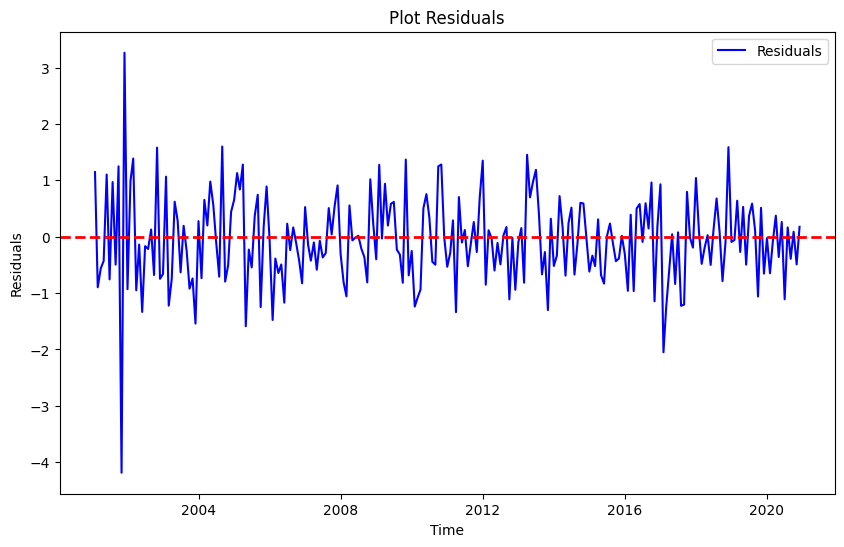

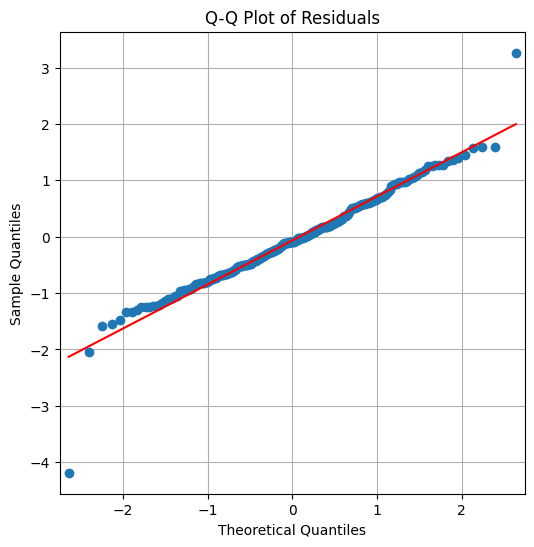

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Residuals dari model yang dilatih
residuals = results.resid

# 1. Plot Residuals dengan Garis Putus-putus
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.axhline(0, linestyle='--', color='red', linewidth=2)  # Garis putus-putus pada y = 0
plt.title('Plot Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# 2. Q-Q Plot
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='s', ax=plt.gca())  # 's' untuk menambahkan garis distribusi normal
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()


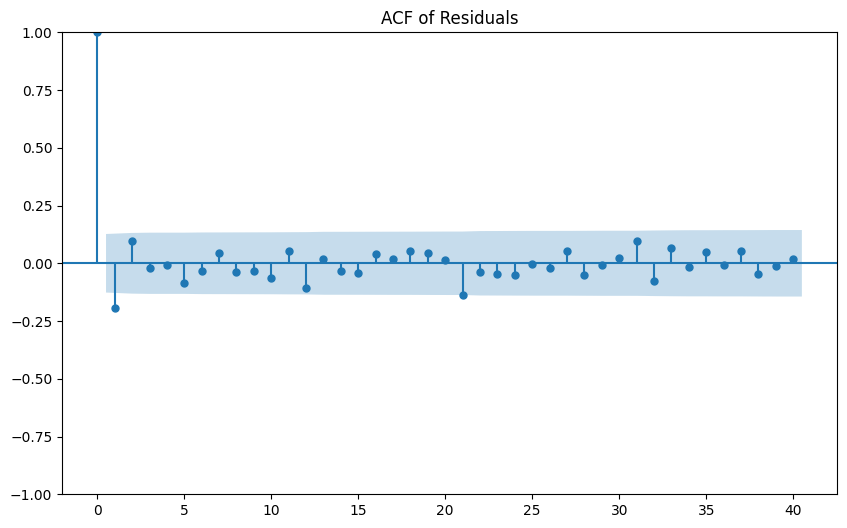

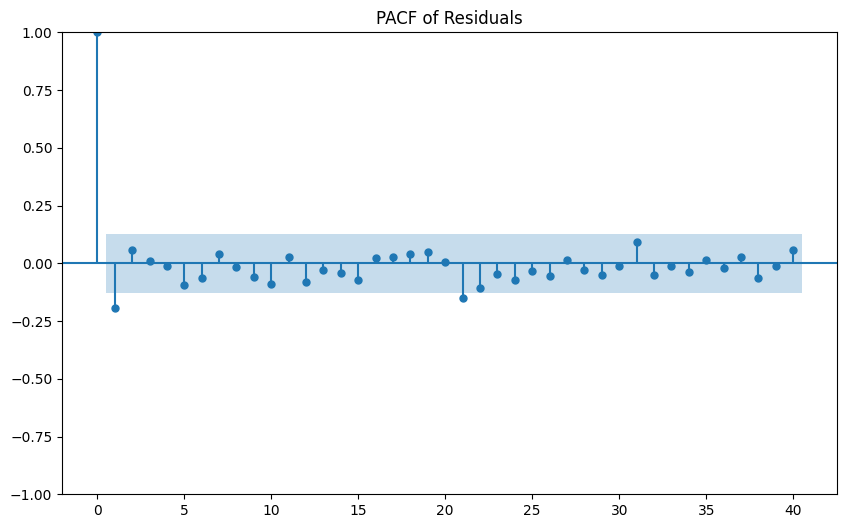

In [ ]:
# Plot ACF dan PACF untuk residual
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')
plt.show()

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(residuals, lags=40, ax=plt.gca())
plt.title('PACF of Residuals')
plt.show()


<Figure size 1000x600 with 0 Axes>

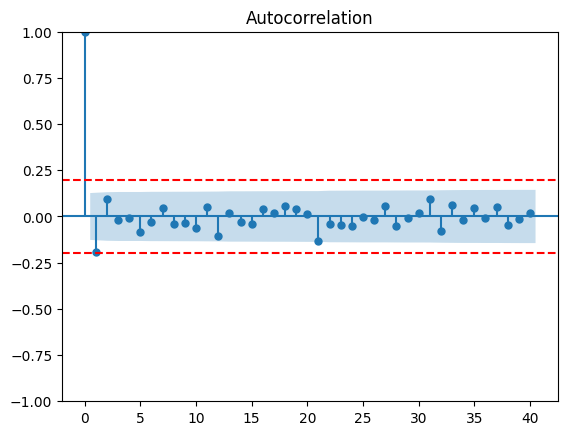

<Figure size 1000x600 with 0 Axes>

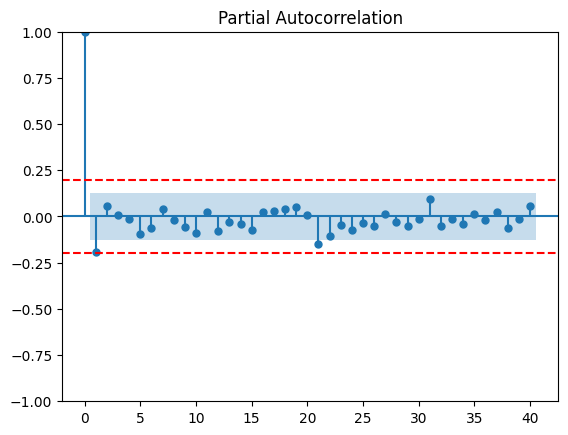

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF Residuals
plt.figure(figsize=(10, 6))
acf_plot = plot_acf(residuals, lags=40)
plt.axhline(y=-0.2, linestyle='--', color='red')  # Tambah garis putus-putus di -0.2 (atau batas lainnya)
plt.axhline(y=0.2, linestyle='--', color='red')   # Tambah garis putus-putus di 0.2 (atau batas lainnya)
plt.show()

# Plot PACF Residuals
plt.figure(figsize=(10, 6))
pacf_plot = plot_pacf(residuals, lags=40)
plt.axhline(y=-0.2, linestyle='--', color='red')  # Tambah garis putus-putus di -0.2
plt.axhline(y=0.2, linestyle='--', color='red')   # Tambah garis putus-putus di 0.2
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_bengkalis = data[data['Kota/Kabupaten'] == 'Bengkalis']

# Convert 'Date' to datetime and set it as index
data_bengkalis['Date'] = pd.to_datetime(data_bengkalis['Date'])
data_bengkalis.set_index('Date', inplace=True)

# Define your time series data
ts = data_bengkalis['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 3)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 3)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 3)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 3)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/Model_ARIMA_SARIMA_Bengkalis_Results.xlsx', index=False)


<ipython-input-25-ce2a6beb0ad2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bengkalis['Date'] = pd.to_datetime(data_bengkalis['Date'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/

                       Model          AIC  Ljung-Box p-value       MAE  \
0               ARIMA(0,1,0)  1051.609168       4.829154e-14  1.713726   
1               ARIMA(0,1,1)   835.416586       9.482175e-07  1.097090   
2               ARIMA(0,1,2)   770.260540       2.089488e-06  0.928549   
3               ARIMA(1,1,0)   968.423009       8.610562e-12  1.451385   
4               ARIMA(1,1,1)   817.536307       3.901297e-09  1.046501   
..                       ...          ...                ...       ...   
85  SARIMA(1,1,1)x(2,1,2,12)   751.779948       1.747222e-05  0.953330   
86  SARIMA(1,1,2)x(2,1,2,12)   690.168843       6.232038e-01  0.850683   
87  SARIMA(2,1,0)x(2,1,2,12)   846.137612       4.938114e-07  1.151205   
88  SARIMA(2,1,1)x(2,1,2,12)   720.849659       1.447990e-02  0.914022   
89  SARIMA(2,1,2)x(2,1,2,12)   690.572165       6.570009e-01  0.849884   

         MSE      RMSE    MAPE  
0   4.799690  2.190819  16.83%  
1   1.906704  1.380834   1.04%  
2   1.424821

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_bengkalis = data[data['Kota/Kabupaten'] == 'Bengkalis']

data_bengkalis

,Date,Kota/Kabupaten,Rata-rata Suhu (°C) - Differenced
239,2001-02-01,Bengkalis,0.756202
240,2001-03-01,Bengkalis,0.531614
241,2001-04-01,Bengkalis,-0.421835
242,2001-05-01,Bengkalis,-0.645760
243,2001-06-01,Bengkalis,0.827453
...,...,...,...
473,2020-08-01,Bengkalis,1.642776
474,2020-09-01,Bengkalis,-0.243094
475,2020-10-01,Bengkalis,-0.360201
476,2020-11-01,Bengkalis,-0.995088


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_bengkalis = data[data['Kota/Kabupaten'] == 'Bengkalis']

# Convert 'Date' to datetime and set it as index
data_bengkalis['Date'] = pd.to_datetime(data_bengkalis['Date'])
data_bengkalis.set_index('Date', inplace=True)

# Define your time series data
ts = data_bengkalis['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 8)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 3)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 3)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_BENGKALIS.xlsx', index=False)


<ipython-input-4-cc9b984155b1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bengkalis['Date'] = pd.to_datetime(data_bengkalis['Date'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/u

                        Model          AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  1051.609168       4.829154e-14  1.713726   
1                ARIMA(0,1,1)   835.416586       9.482175e-07  1.097090   
2                ARIMA(0,1,2)   770.260540       2.089488e-06  0.928549   
3                ARIMA(0,1,3)   754.839132       4.965738e-02  0.891650   
4                ARIMA(1,1,0)   968.423009       8.610562e-12  1.451385   
..                        ...          ...                ...       ...   
315  SARIMA(6,1,3)x(2,1,2,12)   704.696839       1.500260e-01  0.854038   
316  SARIMA(7,1,0)x(2,1,2,12)   745.643490       1.731511e-02  0.936145   
317  SARIMA(7,1,1)x(2,1,2,12)   697.667211       6.476462e-01  0.843196   
318  SARIMA(7,1,2)x(2,1,2,12)   699.411917       6.417423e-01  0.844464   
319  SARIMA(7,1,3)x(2,1,2,12)   698.705709       8.269240e-01  0.845679   

          MSE      RMSE    MAPE  
0    4.799690  2.190819  16.83%  
1    1.906704  1.380834   1.04%

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_inhil = data[data['Kota/Kabupaten'] == 'Indragiri Hilir']

# Convert 'Date' to datetime and set it as index
data_inhil['Date'] = pd.to_datetime(data_inhil['Date'])
data_inhil.set_index('Date', inplace=True)

# Define your time series data
ts = data_inhil['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 5)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_INHI_L.xlsx', index=False)


Failed to fit SARIMA(4,1,2)x(3,1,3,12): LU decomposition error.
                        Model          AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  1012.230370       9.717642e-19  1.582917   
1                ARIMA(0,1,1)   788.357854       1.204855e-10  1.000945   
2                ARIMA(0,1,2)   686.448226       2.079170e-13  0.805988   
3                ARIMA(0,1,3)   689.682656       2.811572e-07  0.808100   
4                ARIMA(1,1,0)   911.777241       5.785776e-12  1.304090   
..                        ...          ...                ...       ...   
334  SARIMA(3,1,2)x(3,1,3,12)   647.272432       7.572101e-05  0.826914   
335  SARIMA(3,1,3)x(3,1,3,12)   617.891733       1.386890e-06  0.763382   
336  SARIMA(4,1,0)x(3,1,3,12)   718.842084       5.737093e-06  0.949547   
337  SARIMA(4,1,1)x(3,1,3,12)   639.151095       8.876491e-06  0.817475   
338  SARIMA(4,1,3)x(3,1,3,12)   647.757262       2.661905e-06  0.830793   

          MSE      RMSE   MAPE  
0 

In [ ]:
data_inhil

,Kota/Kabupaten,Rata-rata Suhu (°C) - Differenced
Date,,
2001-02-01,Indragiri Hilir,1.557955
2001-03-01,Indragiri Hilir,-0.961150
2001-04-01,Indragiri Hilir,1.145213
2001-05-01,Indragiri Hilir,-1.501898
2001-06-01,Indragiri Hilir,0.478094
...,...,...
2020-08-01,Indragiri Hilir,1.398665
2020-09-01,Indragiri Hilir,0.297696
2020-10-01,Indragiri Hilir,-1.432608


ARIMA Model Summary:
                                       SARIMAX Results                                       
Dep. Variable:     Rata-rata Suhu (°C) - Differenced   No. Observations:                  239
Model:                                ARIMA(7, 1, 3)   Log Likelihood                -319.578
Date:                               Fri, 13 Sep 2024   AIC                            661.157
Time:                                       15:04:44   BIC                            699.352
Sample:                                   02-01-2001   HQIC                           676.550
                                        - 12-01-2020                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6666      0.066    -25.359      0.000      -1.795   

<Figure size 1000x600 with 0 Axes>

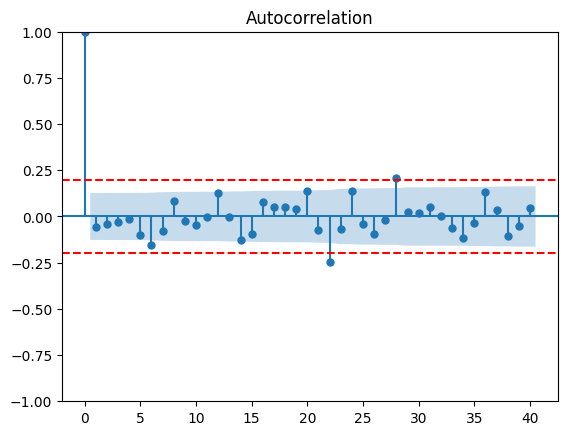

<Figure size 1000x600 with 0 Axes>

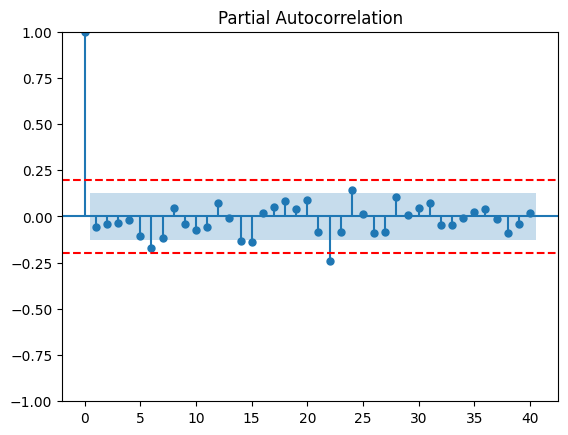

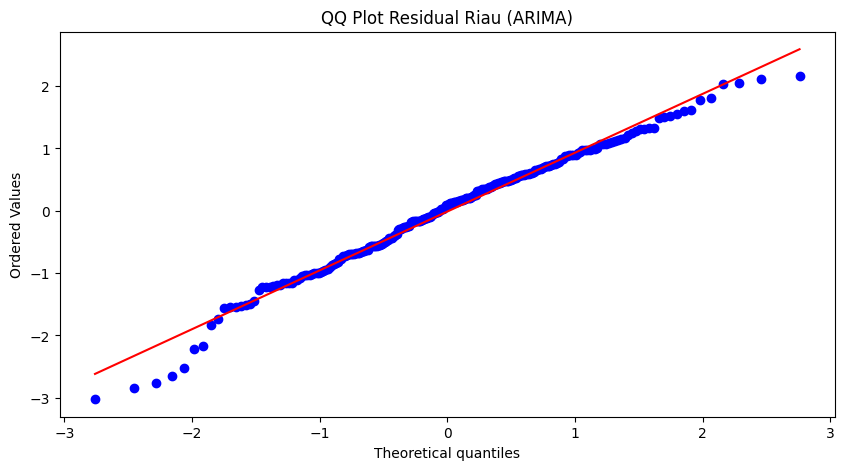

<Figure size 1000x600 with 0 Axes>

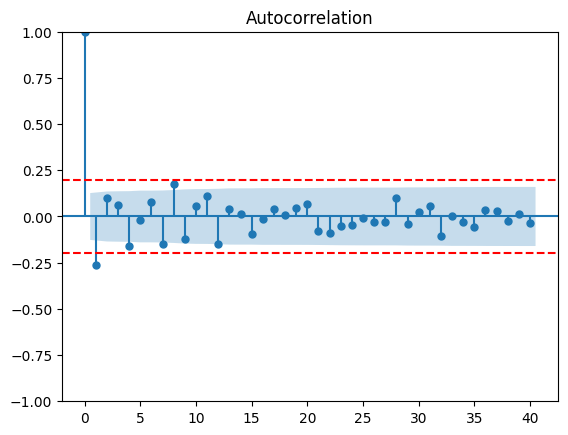

<Figure size 1000x600 with 0 Axes>

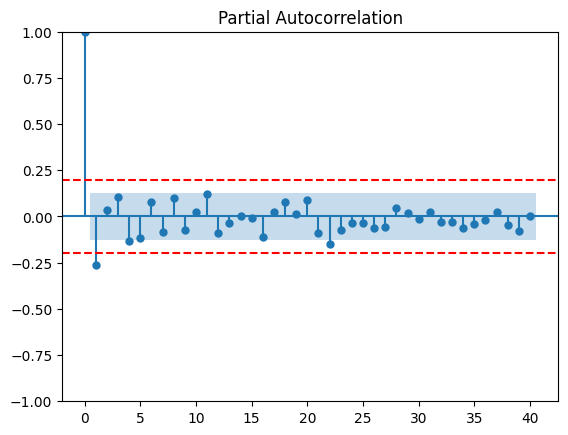

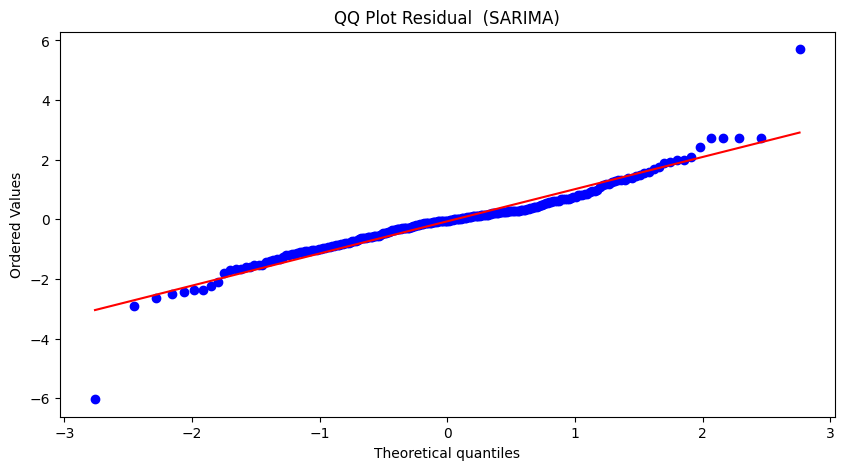

Nilai MAE (ARIMA): 0.750678102735465
Nilai MSE (ARIMA): 0.8856466611112873
Nilai RMSE (ARIMA): 0.9410880198532374
Nilai MAPE (ARIMA): 2.4820236878203925%
Nilai MAE (SARIMA): 0.7671297713185282
Nilai MSE (SARIMA): 1.2448943665667151
Nilai RMSE (SARIMA): 1.1157483437436577
Nilai MAPE (SARIMA): 2.1406934021565234%


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define your time series data
ts = data_inhil['Rata-rata Suhu (°C) - Differenced']

# Define ARIMA model parameters
p = 7  # Order of the autoregressive term
d = 1  # Order of differencing
q = 3  # Order of the moving average term

# Define and fit ARIMA model
arima_model = ARIMA(ts, order=(p, d, q))
arima_fit = arima_model.fit()

# Print summary of the ARIMA model
print("ARIMA Model Summary:")
print(arima_fit.summary())

# Define SARIMA model parameters
pe = 0
de = 1
qe = 2
P = 0  # Seasonal autoregressive order
D = 1  # Seasonal differencing order
Q = 1  # Seasonal moving average order
S = 12 # Number of periods in a season (e.g., 12 for monthly data with yearly seasonality)

# Define and fit SARIMA model
sarima_model = SARIMAX(ts, order=(pe, de, qe), seasonal_order=(P, D, Q, S))
sarima_fit = sarima_model.fit()

# Print summary of the SARIMA model
print("\nSARIMA Model Summary:")
print(sarima_fit.summary())

# Pemeriksaan diagnosis residual
print(f"Diagnosis Residual untuk Riau :")

# Uji Ljung-Box
ljung_box = acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
print("ARIMA Ljung-Box Test p-value:", ljung_box['lb_pvalue'].values)

# Uji Ljung-Box
ljung_box = acorr_ljungbox(sarima_fit.resid, lags=[40], return_df=True)
print("SARIMA Ljung-Box Test p-value:", ljung_box['lb_pvalue'].values)

# Plot ACF Residuals
plt.figure(figsize=(10, 6))
acf_plot = plot_acf(arima_fit.resid, lags=40)
plt.axhline(y=-0.2, linestyle='--', color='red')  # Tambah garis putus-putus di -0.2 (atau batas lainnya)
plt.axhline(y=0.2, linestyle='--', color='red')   # Tambah garis putus-putus di 0.2 (atau batas lainnya)
plt.show()

# Plot PACF Residuals
plt.figure(figsize=(10, 6))
pacf_plot = plot_pacf(arima_fit.resid, lags=40)
plt.axhline(y=-0.2, linestyle='--', color='red')  # Tambah garis putus-putus di -0.2
plt.axhline(y=0.2, linestyle='--', color='red')   # Tambah garis putus-putus di 0.2
plt.show()

# QQ plot untuk uji normalitas residual
plt.figure(figsize=(10, 5))
stats.probplot(arima_fit.resid, dist="norm", plot=plt)
plt.title(f'QQ Plot Residual Riau (ARIMA)')
plt.show()

# Plot ACF Residuals
plt.figure(figsize=(10, 6))
acf_plot = plot_acf(sarima_fit.resid, lags=40)
plt.axhline(y=-0.2, linestyle='--', color='red')  # Tambah garis putus-putus di -0.2 (atau batas lainnya)
plt.axhline(y=0.2, linestyle='--', color='red')   # Tambah garis putus-putus di 0.2 (atau batas lainnya)
plt.show()

# Plot PACF Residuals
plt.figure(figsize=(10, 6))
pacf_plot = plot_pacf(sarima_fit.resid, lags=40)
plt.axhline(y=-0.2, linestyle='--', color='red')  # Tambah garis putus-putus di -0.2
plt.axhline(y=0.2, linestyle='--', color='red')   # Tambah garis putus-putus di 0.2
plt.show()

# QQ plot untuk uji normalitas residual
plt.figure(figsize=(10, 5))
stats.probplot(sarima_fit.resid, dist="norm", plot=plt)
plt.title(f'QQ Plot Residual  (SARIMA)')
plt.show()


# Prediksi menggunakan model ARIMA
pred_arima = arima_fit.predict(start=0, end=len(ts)-1)


# Hitung metrik akurasi ARIMA
mae_arima = mean_absolute_error(ts, pred_arima)
mse_arima = mean_squared_error(ts, pred_arima)
rmse_arima = np.sqrt(mse_arima)
mape_arima = np.mean(np.abs((ts - pred_arima) / ts)) * 1

print(f"Nilai MAE (ARIMA): {mae_arima}")
print(f"Nilai MSE (ARIMA): {mse_arima}")
print(f"Nilai RMSE (ARIMA): {rmse_arima}")
print(f"Nilai MAPE (ARIMA): {mape_arima}%")

# Prediksi menggunakan model SARIMA
pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

# Hitung metrik akurasi SARIMA
mae_sarima = mean_absolute_error(ts, pred_sarima)
mse_sarima = mean_squared_error(ts, pred_sarima)
rmse_sarima = np.sqrt(mse_sarima)
mape_sarima = np.mean(np.abs((ts - pred_sarima) / ts))


print(f"Nilai MAE (SARIMA): {mae_sarima}")
print(f"Nilai MSE (SARIMA): {mse_sarima}")
print(f"Nilai RMSE (SARIMA): {rmse_sarima}")
print(f"Nilai MAPE (SARIMA): {mape_sarima}%")


ADF Statistic: -5.848765170281432
p-value: 3.6308198043584184e-07


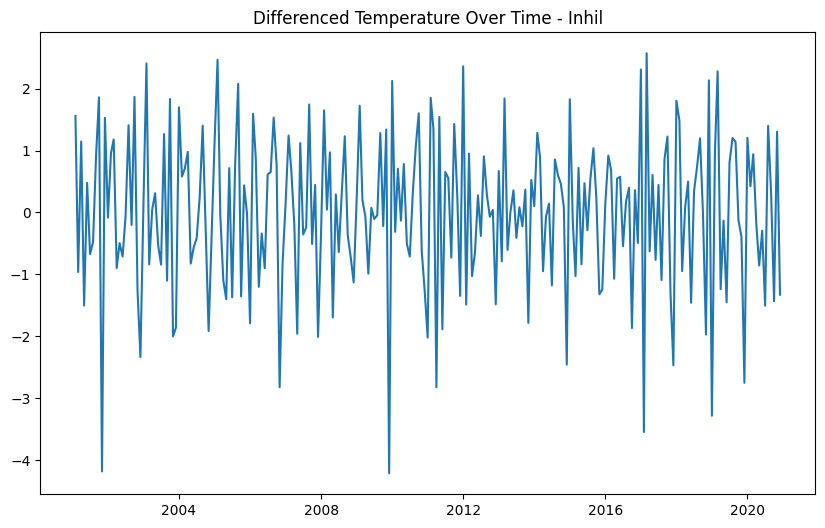

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns

# Cek kestasioneran dengan ADF Test
result_adf = adfuller(ts)
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')

# Plot data
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Differenced Temperature in Inhil')
plt.title('Differenced Temperature Over Time - Inhil')
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fitting SARIMA(1,1,1)x(1,1,1,12) sebagai contoh awal
model = SARIMAX(ts, order=(1, 1, 3), seasonal_order=(0, 1, 1, 12))
sarima_result = model.fit()

# Cek summary model
print(sarima_result.summary())


                                       SARIMAX Results                                       
Dep. Variable:     Rata-rata Suhu (°C) - Differenced   No. Observations:                  239
Model:              SARIMAX(1, 1, 3)x(0, 1, [1], 12)   Log Likelihood                -298.076
Date:                               Fri, 13 Sep 2024   AIC                            608.151
Time:                                       15:57:46   BIC                            628.674
Sample:                                   02-01-2001   HQIC                           616.433
                                        - 12-01-2020                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9998      0.433     -2.308      0.021      -1.849      -0.151
ma.L1      

      lb_stat     lb_pvalue
12  52.921452  4.254041e-07


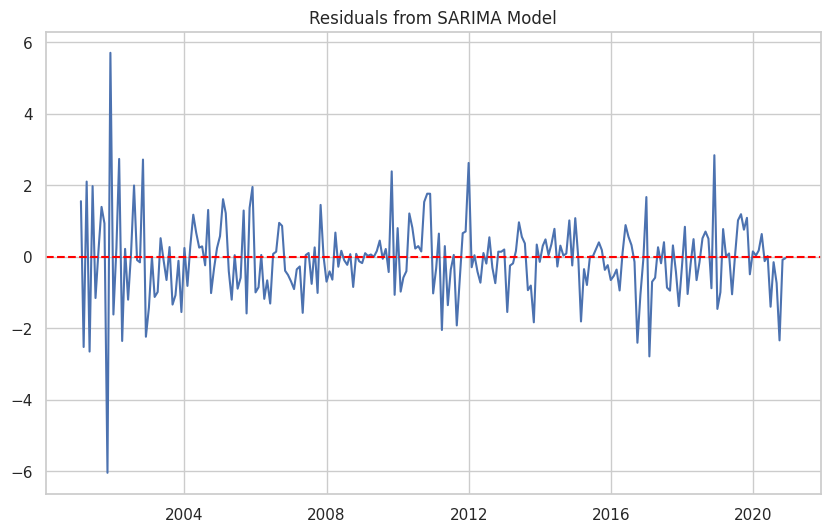

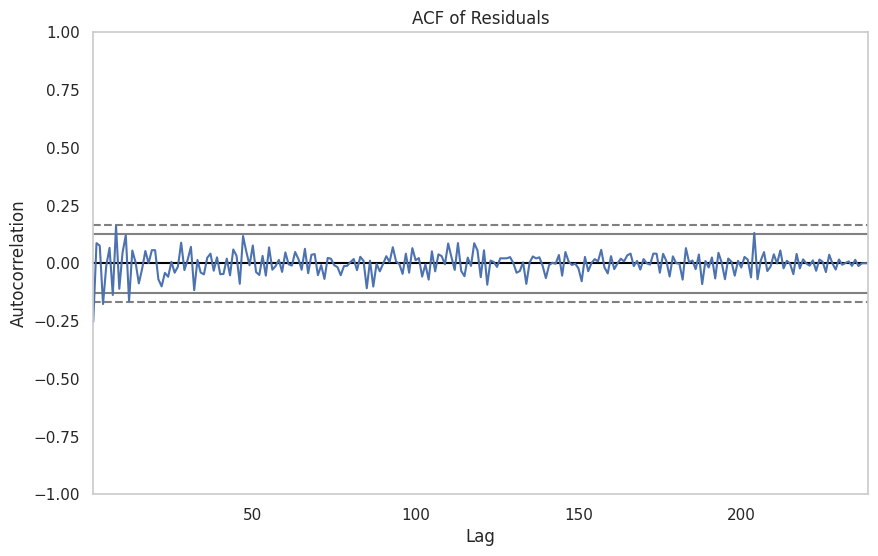

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Cek autokorelasi residual
ljung_box_result = acorr_ljungbox(sarima_result.resid, lags=[12], return_df=True)
print(ljung_box_result)

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(sarima_result.resid, label='Residuals')
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals from SARIMA Model')
plt.show()

# Plot ACF of residuals
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
pd.plotting.autocorrelation_plot(sarima_result.resid)
plt.title('ACF of Residuals')
plt.show()


ARIMA Model Summary:
                                       SARIMAX Results                                       
Dep. Variable:     Rata-rata Suhu (°C) - Differenced   No. Observations:                  228
Model:                                ARIMA(4, 1, 3)   Log Likelihood                -308.617
Date:                               Fri, 13 Sep 2024   AIC                            633.234
Time:                                       16:07:01   BIC                            660.634
Sample:                                   01-01-2002   HQIC                           644.290
                                        - 12-01-2020                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8335      0.268     -3.112      0.002      -1.358   

<Figure size 1000x600 with 0 Axes>

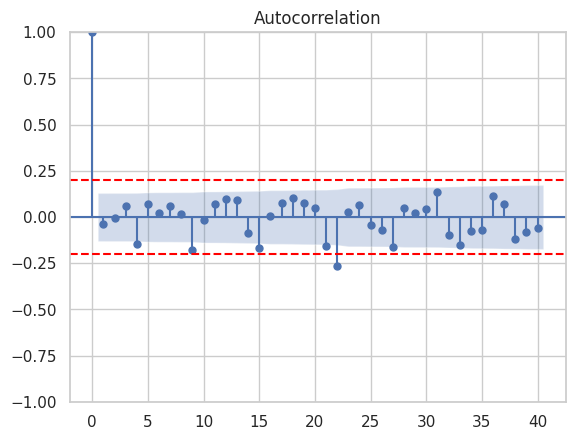

<Figure size 1000x600 with 0 Axes>

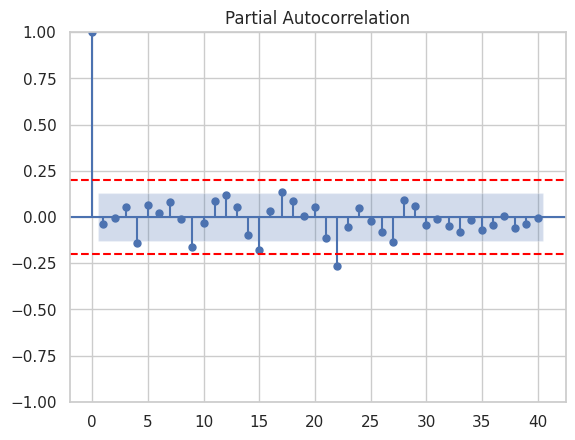

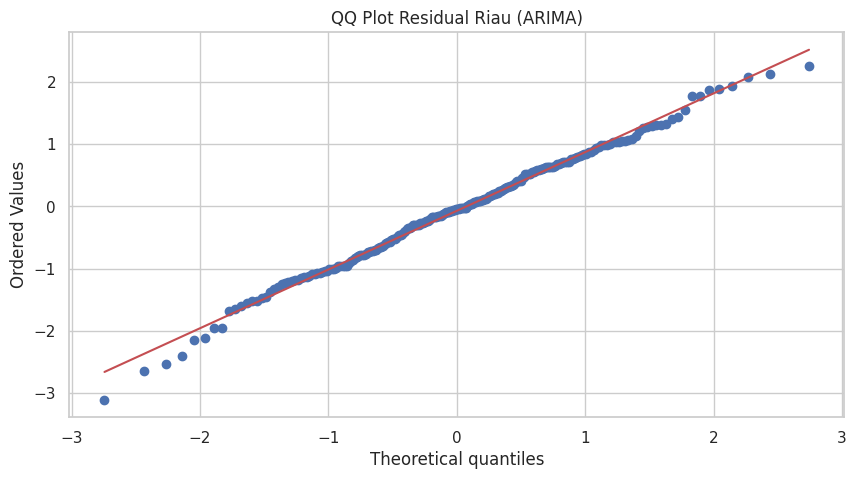

<Figure size 1000x600 with 0 Axes>

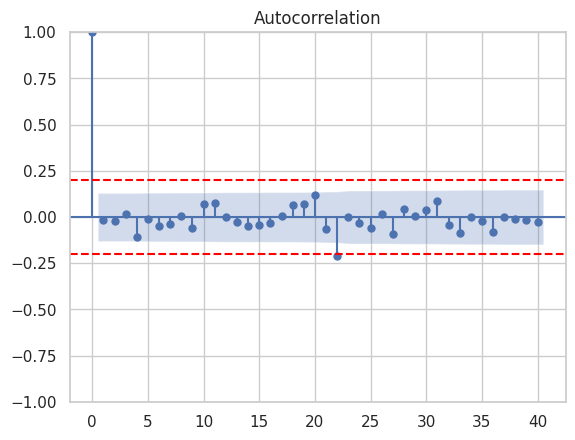

<Figure size 1000x600 with 0 Axes>

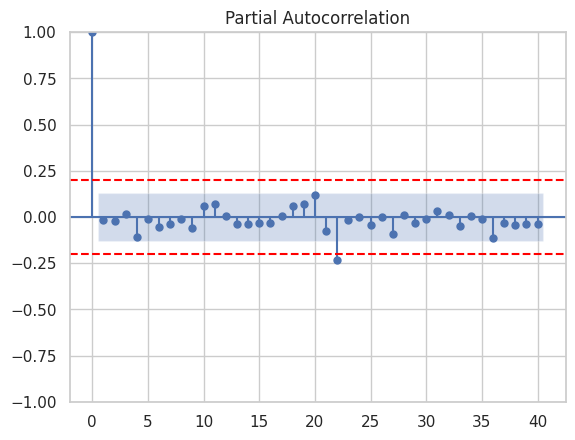

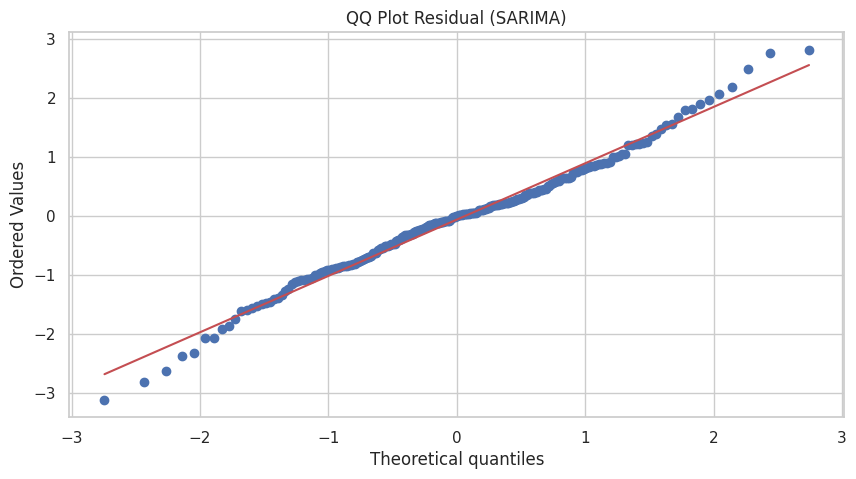

Nilai MAE (ARIMA): 0.7419296855052354
Nilai MSE (ARIMA): 0.8844043727817023
Nilai RMSE (ARIMA): 0.940427760533313
Nilai MAPE (ARIMA): 218.27754354712016%
Nilai MAE (SARIMA): 0.7146853694813716
Nilai MSE (SARIMA): 0.9119098152459771
Nilai RMSE (SARIMA): 0.9549396919418405
Nilai MAPE (SARIMA): 211.86911236398737%


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Filter data for the years 2002 to 2020
data_inhil = data[data['Kota/Kabupaten'] == 'Indragiri Hilir']
data_inhil['Date'] = pd.to_datetime(data_inhil['Date'])
data_inhil.set_index('Date', inplace=True)
data_inhil = data_inhil[(data_inhil.index.year >= 2002) & (data_inhil.index.year <= 2020)]

# Define your time series data
ts = data_inhil['Rata-rata Suhu (°C) - Differenced']

# Define ARIMA model parameters
p = 4  # Order of the autoregressive term
d = 1  # Order of differencing
q = 3  # Order of the moving average term

# Define and fit ARIMA model
arima_model = ARIMA(ts, order=(p, d, q))
arima_fit = arima_model.fit()

# Print summary of the ARIMA model
print("ARIMA Model Summary:")
print(arima_fit.summary())

# Define SARIMA model parameters
pe = 0
de = 1
qe = 2
P = 0  # Seasonal autoregressive order
D = 1  # Seasonal differencing order
Q = 1  # Seasonal moving average order
S = 12 # Number of periods in a season (e.g., 12 for monthly data with yearly seasonality)

# Define and fit SARIMA model
sarima_model = SARIMAX(ts, order=(pe, de, qe), seasonal_order=(P, D, Q, S))
sarima_fit = sarima_model.fit()

# Print summary of the SARIMA model
print("\nSARIMA Model Summary:")
print(sarima_fit.summary())

# Diagnostics for ARIMA
print(f"Diagnosis Residual untuk Riau :")
ljung_box_arima = acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
print("ARIMA Ljung-Box Test p-value:", ljung_box_arima['lb_pvalue'].values)

# Diagnostics for SARIMA
ljung_box_sarima = acorr_ljungbox(sarima_fit.resid, lags=[40], return_df=True)
print("SARIMA Ljung-Box Test p-value:", ljung_box_sarima['lb_pvalue'].values)

# Plot ACF and PACF Residuals
plt.figure(figsize=(10, 6))
plot_acf(arima_fit.resid, lags=40)
plt.axhline(y=-0.2, linestyle='--', color='red')
plt.axhline(y=0.2, linestyle='--', color='red')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(arima_fit.resid, lags=40)
plt.axhline(y=-0.2, linestyle='--', color='red')
plt.axhline(y=0.2, linestyle='--', color='red')
plt.show()

plt.figure(figsize=(10, 5))
stats.probplot(arima_fit.resid, dist="norm", plot=plt)
plt.title(f'QQ Plot Residual Riau (ARIMA)')
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(sarima_fit.resid, lags=40)
plt.axhline(y=-0.2, linestyle='--', color='red')
plt.axhline(y=0.2, linestyle='--', color='red')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(sarima_fit.resid, lags=40)
plt.axhline(y=-0.2, linestyle='--', color='red')
plt.axhline(y=0.2, linestyle='--', color='red')
plt.show()

plt.figure(figsize=(10, 5))
stats.probplot(sarima_fit.resid, dist="norm", plot=plt)
plt.title(f'QQ Plot Residual (SARIMA)')
plt.show()

# Prediction and accuracy metrics for ARIMA
pred_arima = arima_fit.predict(start=0, end=len(ts)-1)
mae_arima = mean_absolute_error(ts, pred_arima)
mse_arima = mean_squared_error(ts, pred_arima)
rmse_arima = np.sqrt(mse_arima)
mape_arima = np.mean(np.abs((ts - pred_arima) / ts)) * 100

print(f"Nilai MAE (ARIMA): {mae_arima}")
print(f"Nilai MSE (ARIMA): {mse_arima}")
print(f"Nilai RMSE (ARIMA): {rmse_arima}")
print(f"Nilai MAPE (ARIMA): {mape_arima}%")

# Prediction and accuracy metrics for SARIMA
pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)
mae_sarima = mean_absolute_error(ts, pred_sarima)
mse_sarima = mean_squared_error(ts, pred_sarima)
rmse_sarima = np.sqrt(mse_sarima)
mape_sarima = np.mean(np.abs((ts - pred_sarima) / ts)) * 100

print(f"Nilai MAE (SARIMA): {mae_sarima}")
print(f"Nilai MSE (SARIMA): {mse_sarima}")
print(f"Nilai RMSE (SARIMA): {rmse_sarima}")
print(f"Nilai MAPE (SARIMA): {mape_sarima}%")


ARIMA Model Summary:
                                       SARIMAX Results                                       
Dep. Variable:     Rata-rata Suhu (°C) - Differenced   No. Observations:                  228
Model:                                ARIMA(2, 1, 2)   Log Likelihood                -315.747
Date:                               Fri, 13 Sep 2024   AIC                            641.494
Time:                                       16:57:28   BIC                            658.619
Sample:                                   01-01-2002   HQIC                           648.404
                                        - 12-01-2020                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2287      0.071      3.224      0.001       0.090   

<Figure size 1000x600 with 0 Axes>

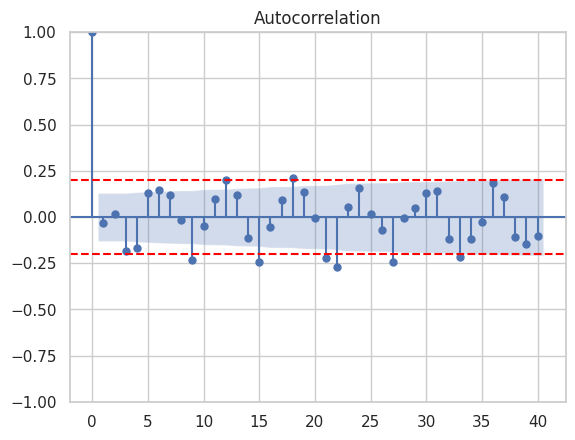

<Figure size 1000x600 with 0 Axes>

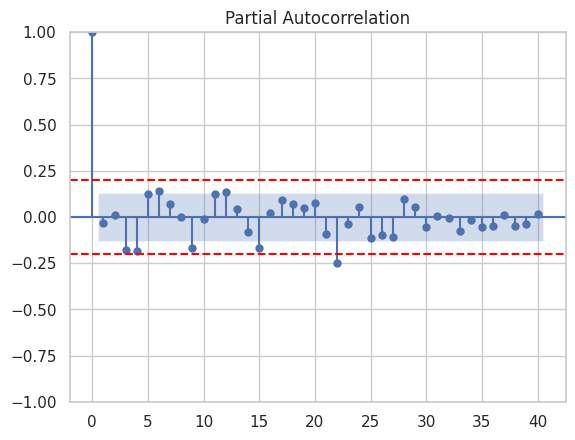

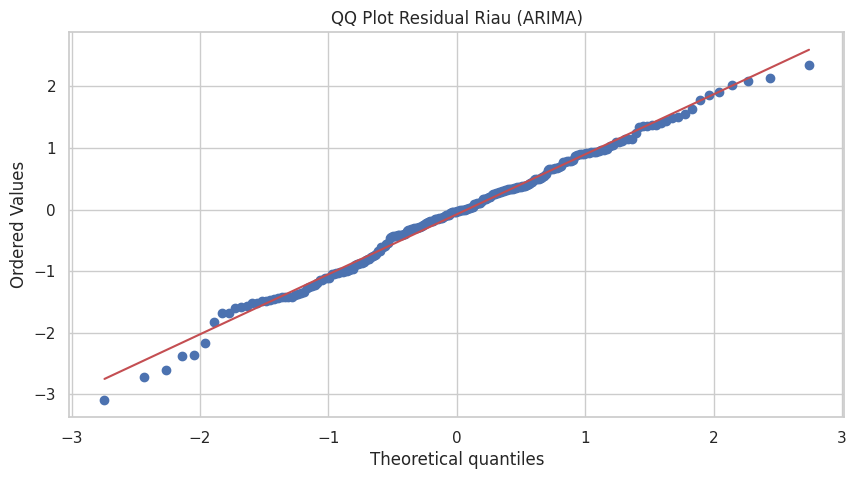

<Figure size 1000x600 with 0 Axes>

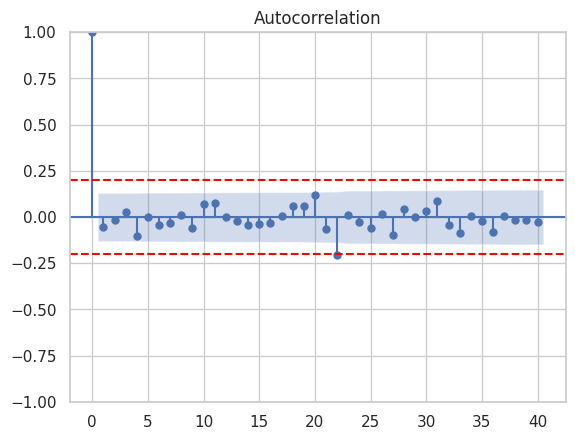

<Figure size 1000x600 with 0 Axes>

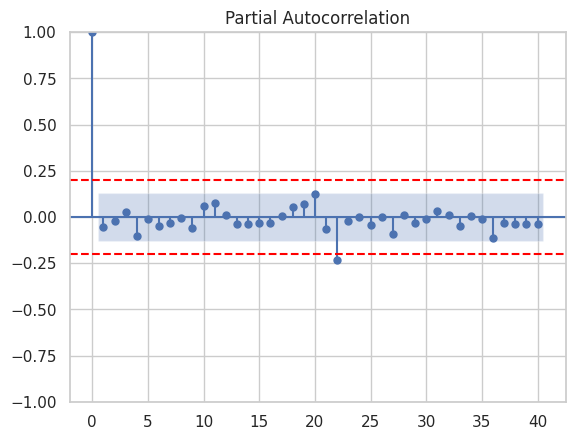

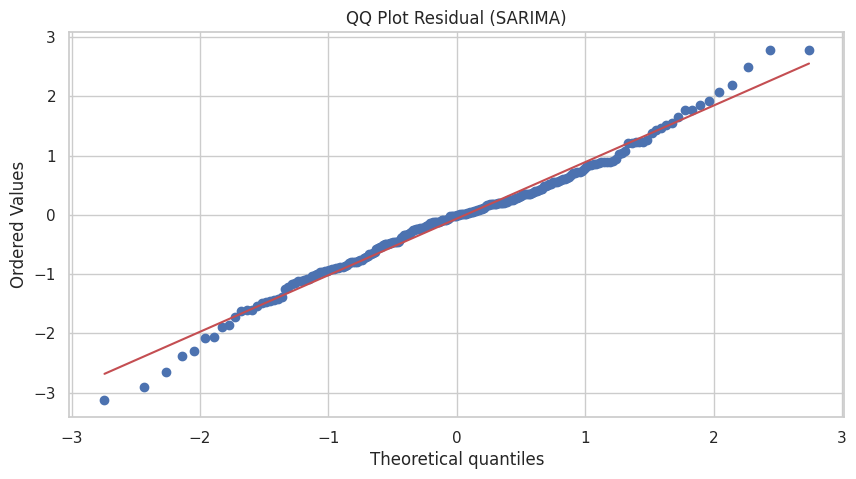

Nilai MAE (ARIMA): 0.7636203347437885
Nilai MSE (ARIMA): 0.9424890429917687
Nilai RMSE (ARIMA): 0.9708187487846373
Nilai MAPE (ARIMA): 216.0768918524596%
Nilai MAE (SARIMA): 0.7123508391877095
Nilai MSE (SARIMA): 0.9100817522062078
Nilai RMSE (SARIMA): 0.9539820502536763
Nilai MAPE (SARIMA): 207.63918828707216%


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Filter data for the years 2002 to 2020
data_inhil = data[data['Kota/Kabupaten'] == 'Indragiri Hilir']
data_inhil['Date'] = pd.to_datetime(data_inhil['Date'])
data_inhil.set_index('Date', inplace=True)
data_inhil = data_inhil[(data_inhil.index.year >= 2002) & (data_inhil.index.year <= 2020)]

# Define your time series data
ts = data_inhil['Rata-rata Suhu (°C) - Differenced']

# Define ARIMA model parameters
p = 2  # Order of the autoregressive term
d = 1  # Order of differencing
q = 2  # Order of the moving average term

# Define and fit ARIMA model
arima_model = ARIMA(ts, order=(p, d, q))
arima_fit = arima_model.fit()

# Print summary of the ARIMA model
print("ARIMA Model Summary:")
print(arima_fit.summary())

# Define SARIMA model parameters
pe = 1
de = 1
qe = 2
P = 0  # Seasonal autoregressive order
D = 1  # Seasonal differencing order
Q = 1  # Seasonal moving average order
S = 12 # Number of periods in a season (e.g., 12 for monthly data with yearly seasonality)

# Define and fit SARIMA model
sarima_model = SARIMAX(ts, order=(pe, de, qe), seasonal_order=(P, D, Q, S))
sarima_fit = sarima_model.fit()

# Print summary of the SARIMA model
print("\nSARIMA Model Summary:")
print(sarima_fit.summary())

# Diagnostics for ARIMA
print(f"Diagnosis Residual untuk Riau :")
ljung_box_arima = acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
print("ARIMA Ljung-Box Test p-value:", ljung_box_arima['lb_pvalue'].values)

# Diagnostics for SARIMA
ljung_box_sarima = acorr_ljungbox(sarima_fit.resid, lags=[40], return_df=True)
print("SARIMA Ljung-Box Test p-value:", ljung_box_sarima['lb_pvalue'].values)

# Plot ACF and PACF Residuals
plt.figure(figsize=(10, 6))
plot_acf(arima_fit.resid, lags=40)
plt.axhline(y=-0.2, linestyle='--', color='red')
plt.axhline(y=0.2, linestyle='--', color='red')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(arima_fit.resid, lags=40)
plt.axhline(y=-0.2, linestyle='--', color='red')
plt.axhline(y=0.2, linestyle='--', color='red')
plt.show()

plt.figure(figsize=(10, 5))
stats.probplot(arima_fit.resid, dist="norm", plot=plt)
plt.title(f'QQ Plot Residual Riau (ARIMA)')
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(sarima_fit.resid, lags=40)
plt.axhline(y=-0.2, linestyle='--', color='red')
plt.axhline(y=0.2, linestyle='--', color='red')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(sarima_fit.resid, lags=40)
plt.axhline(y=-0.2, linestyle='--', color='red')
plt.axhline(y=0.2, linestyle='--', color='red')
plt.show()

plt.figure(figsize=(10, 5))
stats.probplot(sarima_fit.resid, dist="norm", plot=plt)
plt.title(f'QQ Plot Residual (SARIMA)')
plt.show()

# Prediction and accuracy metrics for ARIMA
pred_arima = arima_fit.predict(start=0, end=len(ts)-1)
mae_arima = mean_absolute_error(ts, pred_arima)
mse_arima = mean_squared_error(ts, pred_arima)
rmse_arima = np.sqrt(mse_arima)
mape_arima = np.mean(np.abs((ts - pred_arima) / ts)) * 100

print(f"Nilai MAE (ARIMA): {mae_arima}")
print(f"Nilai MSE (ARIMA): {mse_arima}")
print(f"Nilai RMSE (ARIMA): {rmse_arima}")
print(f"Nilai MAPE (ARIMA): {mape_arima}%")

# Prediction and accuracy metrics for SARIMA
pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)
mae_sarima = mean_absolute_error(ts, pred_sarima)
mse_sarima = mean_squared_error(ts, pred_sarima)
rmse_sarima = np.sqrt(mse_sarima)
mape_sarima = np.mean(np.abs((ts - pred_sarima) / ts)) * 100

print(f"Nilai MAE (SARIMA): {mae_sarima}")
print(f"Nilai MSE (SARIMA): {mse_sarima}")
print(f"Nilai RMSE (SARIMA): {rmse_sarima}")
print(f"Nilai MAPE (SARIMA): {mape_sarima}%")


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_inhil = data[data['Kota/Kabupaten'] == 'Indragiri Hilir']

# Convert 'Date' to datetime and set it as index
data_inhil['Date'] = pd.to_datetime(data_inhil['Date'])
data_inhil.set_index('Date', inplace=True)
data_inhil = data_inhil[(data_inhil.index.year >= 2002) & (data_inhil.index.year <= 2020)]

# Define your time series data
ts = data_inhil['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_INHIL_2002-2020.xlsx', index=False)


                        Model         AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  952.275693       4.663846e-16  1.537527   
1                ARIMA(0,1,1)  742.430154       1.576272e-09  0.977194   
2                ARIMA(0,1,2)  652.325142       5.110904e-15  0.792461   
3                ARIMA(0,1,3)  651.515862       7.247196e-07  0.792465   
4                ARIMA(1,1,0)  862.044553       2.356464e-11  1.283753   
..                        ...         ...                ...       ...   
267  SARIMA(2,1,3)x(3,1,3,12)  583.996816       7.926300e-01  0.710317   
268  SARIMA(3,1,0)x(3,1,3,12)  700.205591       4.510802e-04  0.941246   
269  SARIMA(3,1,1)x(3,1,3,12)  614.150793       5.529795e-02  0.774231   
270  SARIMA(3,1,2)x(3,1,3,12)  618.452038       5.713687e-02  0.780025   
271  SARIMA(3,1,3)x(3,1,3,12)  585.425641       7.525559e-01  0.706456   

          MSE      RMSE   MAPE  
0    3.834242  1.958122  3.89%  
1    1.504187  1.226453  1.03%  
2    1.01082

In [ ]:
# Example: Assuming you are working with the city 'Riau'
data_inhu = data[data['Kota/Kabupaten'] == 'Indragiri Hulu']
data_inhu

,Date,Kota/Kabupaten,Rata-rata Suhu (°C) - Differenced
717,2001-02-01,Indragiri Hulu,0.866947
718,2001-03-01,Indragiri Hulu,-0.015763
719,2001-04-01,Indragiri Hulu,-0.390934
720,2001-05-01,Indragiri Hulu,-0.504994
721,2001-06-01,Indragiri Hulu,0.553167
...,...,...,...
951,2020-08-01,Indragiri Hulu,1.054775
952,2020-09-01,Indragiri Hulu,0.763024
953,2020-10-01,Indragiri Hulu,-0.870753
954,2020-11-01,Indragiri Hulu,0.688109


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_inhu = data[data['Kota/Kabupaten'] == 'Indragiri Hulu']

# Convert 'Date' to datetime and set it as index
data_inhu['Date'] = pd.to_datetime(data_inhu['Date'])
data_inhu.set_index('Date', inplace=True)
# data_inhu = data_inhu[(data_inhu.index.year >= 2002) & (data_inhu.index.year <= 2020)]

# Define your time series data
ts = data_inhu['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_INHU BARU.xlsx', index=False)


<ipython-input-1-01ece07355f2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_inhu['Date'] = pd.to_datetime(data_inhu['Date'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/l

                        Model          AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  1047.905323       3.654824e-18  1.666973   
1                ARIMA(0,1,1)   824.086398       6.536729e-10  1.036753   
2                ARIMA(0,1,2)   732.779298       6.681183e-11  0.863868   
3                ARIMA(0,1,3)   720.406754       1.566616e-05  0.839140   
4                ARIMA(1,1,0)   950.859584       3.378384e-12  1.348901   
..                        ...          ...                ...       ...   
267  SARIMA(2,1,3)x(3,1,3,12)   663.095023       2.637380e-01  0.798325   
268  SARIMA(3,1,0)x(3,1,3,12)   776.303157       1.573163e-03  1.018572   
269  SARIMA(3,1,1)x(3,1,3,12)   685.962721       2.647167e-02  0.821075   
270  SARIMA(3,1,2)x(3,1,3,12)   690.097621       3.915051e-02  0.829023   
271  SARIMA(3,1,3)x(3,1,3,12)   663.102483       3.989466e-01  0.799216   

          MSE      RMSE   MAPE  
0    4.726362  2.174020  3.63%  
1    1.821375  1.349583  1.24%  


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_inhu = data[data['Kota/Kabupaten'] == 'Indragiri Hulu']

# Convert 'Date' to datetime and set it as index
data_inhu['Date'] = pd.to_datetime(data_inhu['Date'])
data_inhu.set_index('Date', inplace=True)
data_inhu = data_inhu[(data_inhu.index.year >= 2002) & (data_inhu.index.year <= 2020)]

# Define your time series data
ts = data_inhu['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_INHU_2002-2020 BARU.xlsx', index=False)


<ipython-input-2-e2b49d8e80c9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_inhu['Date'] = pd.to_datetime(data_inhu['Date'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/l

KeyboardInterrupt: 

In [ ]:
data_kampar = data[data['Kota/Kabupaten'] == 'Kampar']
data_kampar

,Date,Kota/Kabupaten,Rata-rata Suhu (°C) - Differenced
956,2001-02-01,Kampar,1.254914
957,2001-03-01,Kampar,0.899720
958,2001-04-01,Kampar,-0.772253
959,2001-05-01,Kampar,-0.957528
960,2001-06-01,Kampar,-0.023777
...,...,...,...
1190,2020-08-01,Kampar,1.693880
1191,2020-09-01,Kampar,-0.563611
1192,2020-10-01,Kampar,-2.183255
1193,2020-11-01,Kampar,0.703787


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_kampar = data[data['Kota/Kabupaten'] == 'Kampar']

# Convert 'Date' to datetime and set it as index
data_kampar['Date'] = pd.to_datetime(data_kampar['Date'])
data_kampar.set_index('Date', inplace=True)
#data_kampar = data_kampar[(data_kampar.index.year >= 2002) & (data_kampar.index.year <= 2020)]

# Define your time series data
ts = data_kampar['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_KAMPAR Baru.xlsx', index=False)


<ipython-input-3-5ddbb20eac31>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kampar['Date'] = pd.to_datetime(data_kampar['Date'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/loc

                        Model         AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  994.704134       1.212313e-21  1.532119   
1                ARIMA(0,1,1)  771.468519       6.597473e-12  0.967672   
2                ARIMA(0,1,2)  691.660779       5.473823e-16  0.808209   
3                ARIMA(0,1,3)  677.382935       1.540055e-08  0.771194   
4                ARIMA(1,1,0)  886.507000       2.123319e-13  1.216193   
..                        ...         ...                ...       ...   
267  SARIMA(2,1,3)x(3,1,3,12)  598.707869       1.751231e-06  0.742899   
268  SARIMA(3,1,0)x(3,1,3,12)  694.574268       5.736590e-08  0.911839   
269  SARIMA(3,1,1)x(3,1,3,12)  602.239053       4.656391e-06  0.749727   
270  SARIMA(3,1,2)x(3,1,3,12)  594.526721       1.206610e-06  0.738955   
271  SARIMA(3,1,3)x(3,1,3,12)  595.643431       2.759970e-05  0.735041   

          MSE      RMSE   MAPE  
0    3.783687  1.945170  3.31%  
1    1.474214  1.214172  1.06%  
2    1.05651

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_kampar = data[data['Kota/Kabupaten'] == 'Kampar']

# Convert 'Date' to datetime and set it as index
data_kampar['Date'] = pd.to_datetime(data_kampar['Date'])
data_kampar.set_index('Date', inplace=True)
data_kampar = data_kampar[(data_kampar.index.year >= 2002) & (data_kampar.index.year <= 2020)]

# Define your time series data
ts = data_kampar['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_KAMPAR_2002-2020 Baru.xlsx', index=False)


<ipython-input-4-e93b709186a3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kampar['Date'] = pd.to_datetime(data_kampar['Date'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/loc

                        Model         AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  943.190184       3.063027e-18  1.519977   
1                ARIMA(0,1,1)  732.082849       2.384725e-10  0.965854   
2                ARIMA(0,1,2)  657.022100       3.965996e-15  0.796765   
3                ARIMA(0,1,3)  642.099661       2.144605e-07  0.770500   
4                ARIMA(1,1,0)  846.531806       6.465676e-12  1.220834   
..                        ...         ...                ...       ...   
267  SARIMA(2,1,3)x(3,1,3,12)  568.095710       7.449420e-02  0.711999   
268  SARIMA(3,1,0)x(3,1,3,12)  664.271339       1.130132e-06  0.890973   
269  SARIMA(3,1,1)x(3,1,3,12)  574.354116       1.284793e-02  0.717902   
270  SARIMA(3,1,2)x(3,1,3,12)  564.167072       3.330696e-02  0.706456   
271  SARIMA(3,1,3)x(3,1,3,12)  565.116658       1.729386e-01  0.706331   

          MSE      RMSE   MAPE  
0    3.691991  1.921455  3.22%  
1    1.460897  1.208676  1.05%  
2    1.05591

In [ ]:
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_Real_dan_Diff.xlsx'

data = pd.read_excel(file_path)

data

,Date,Kota/Kabupaten,Rata-rata Suhu (°C) - Differenced,Rata-rata Suhu (°C)
0,2001-02-01,Riau,1.146295,29.144357
1,2001-03-01,Riau,0.248788,29.393144
2,2001-04-01,Riau,-0.315938,29.077206
3,2001-05-01,Riau,-0.746128,28.331078
4,2001-06-01,Riau,0.357091,28.688169
...,...,...,...,...
3100,2020-08-01,Siak,0.543342,28.302988
3101,2020-09-01,Siak,0.670108,28.973096
3102,2020-10-01,Siak,-0.641152,28.331944
3103,2020-11-01,Siak,-1.815996,26.515948


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
# file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'

file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_Real_dan_Diff.xlsx'

data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_kampar = data[data['Kota/Kabupaten'] == 'Kampar']

# Convert 'Date' to datetime and set it as index
data_kampar['Date'] = pd.to_datetime(data_kampar['Date'])
data_kampar.set_index('Date', inplace=True)
data_kampar = data_kampar[(data_kampar.index.year >= 2003) & (data_kampar.index.year <= 2020)]

# Define your time series data
ts = data_kampar['Rata-rata Suhu (°C) - Differenced']
ts_original = data_kampar['Rata-rata Suhu (°C)']
# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 100
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# # Loop over different ARIMA models (p, d, q)
# for p in p_values:
#     for q in q_values:
#         try:
#             # Define and fit ARIMA model
#             arima_model = ARIMA(ts, order=(p, d, q))
#             arima_fit = arima_model.fit()

#             # Predict using ARIMA model
#             pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

#             # Calculate accuracy metrics for ARIMA
#             mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

#             mape_arima = calculate_metrics(ts_original, pred_arima)

#             # Perform Ljung-Box test on residuals
#             ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
#             ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

#             # Store ARIMA results
#             results.append({
#                 'Model': f'ARIMA({p},{d},{q})',
#                 'AIC': arima_fit.aic,
#                 'Ljung-Box p-value': ljung_box_pvalue,
#                 'MAE': mae_arima,
#                 'MSE': mse_arima,
#                 'RMSE': rmse_arima,
#                 'MAPE': f'{mape_arima:.2f}%'
#             })
#         except Exception as e:
#             print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima = calculate_metrics(ts, pred_sarima)

                    mape_sarima = calculate_metrics(ts_original, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_KAMPAR_2003-2020 Baru.xlsx', index=False)


Failed to fit SARIMA(0,1,0)x(0,1,0,12): too many values to unpack (expected 3)
Failed to fit SARIMA(0,1,1)x(0,1,0,12): too many values to unpack (expected 3)
Failed to fit SARIMA(0,1,2)x(0,1,0,12): too many values to unpack (expected 3)


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_Real_dan_Diff.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Kampar'
data_kampar = data[data['Kota/Kabupaten'] == 'Kampar']

# Convert 'Date' to datetime and set it as index
data_kampar['Date'] = pd.to_datetime(data_kampar['Date'])
data_kampar.set_index('Date', inplace=True)
data_kampar = data_kampar[(data_kampar.index.year >= 2003) & (data_kampar.index.year <= 2020)]

# Define your time series data
ts = data_kampar['Rata-rata Suhu (°C) - Differenced']
ts_original = data_kampar['Rata-rata Suhu (°C)']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)
d = 1  # fixed differencing order
q_values = range(0, 4)

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics (excluding MAPE)
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# Function to calculate MAPE using ts_original
def calculate_mape(original_values, pred_values):
    non_zero_original_values = original_values[original_values != 0]
    non_zero_pred_values = pred_values[original_values != 0]

    if len(non_zero_original_values) > 0:
        mape = np.mean(np.abs((non_zero_original_values - non_zero_pred_values) / non_zero_original_values)) * 100
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mape

for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics (excluding MAPE)
                    mae_sarima, mse_sarima, rmse_sarima = calculate_metrics(ts, pred_sarima)

                    # Calculate MAPE using original time series
                    mape_sarima = calculate_mape(ts_original, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_KAMPAR_2003-2020_Baru.xlsx', index=False)


                        Model         AIC  Ljung-Box p-value       MAE  \
0    SARIMA(0,1,0)x(0,1,0,12)  973.343671       2.633231e-28  2.094416   
1    SARIMA(0,1,1)x(0,1,0,12)  746.851905       1.265132e-17  1.245700   
2    SARIMA(0,1,2)x(0,1,0,12)  625.231930       3.673879e-05  0.975585   
3    SARIMA(0,1,3)x(0,1,0,12)  619.844514       2.679089e-02  0.965217   
4    SARIMA(1,1,0)x(0,1,0,12)  824.868353       6.518442e-12  1.489314   
..                        ...         ...                ...       ...   
251  SARIMA(2,1,3)x(3,1,3,12)  547.343755       1.828039e-04  0.795949   
252  SARIMA(3,1,0)x(3,1,3,12)  635.240585       4.098090e-05  0.965812   
253  SARIMA(3,1,1)x(3,1,3,12)  552.891599       8.827170e-04  0.798375   
254  SARIMA(3,1,2)x(3,1,3,12)  541.303067       2.027586e-04  0.777544   
255  SARIMA(3,1,3)x(3,1,3,12)  546.430082       6.998010e-04  0.783648   

          MSE      RMSE     MAPE  
0    6.912992  2.629257  100.06%  
1    2.521002  1.587766   99.85%  
2    1

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

data_Meranti = data[data['Kota/Kabupaten'] == 'Kepulauan Meranti']
data_Meranti

,Date,Kota/Kabupaten,Rata-rata Suhu (°C) - Differenced
1195,2001-02-01,Kepulauan Meranti,-0.747061
1196,2001-03-01,Kepulauan Meranti,0.246807
1197,2001-04-01,Kepulauan Meranti,0.096827
1198,2001-05-01,Kepulauan Meranti,-0.223463
1199,2001-06-01,Kepulauan Meranti,0.614139
...,...,...,...
1429,2020-08-01,Kepulauan Meranti,1.336434
1430,2020-09-01,Kepulauan Meranti,-0.012089
1431,2020-10-01,Kepulauan Meranti,-1.123745
1432,2020-11-01,Kepulauan Meranti,-0.915062


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_Meranti = data[data['Kota/Kabupaten'] == 'Kepulauan Meranti']

# Convert 'Date' to datetime and set it as index
data_Meranti['Date'] = pd.to_datetime(data_Meranti['Date'])
data_Meranti.set_index('Date', inplace=True)
#data_Meranti = data_Meranti[(data_Meranti.index.year >= 2002) & (data_Meranti.index.year <= 2020)]

# Define your time series data
ts = data_Meranti['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_MERANTI.xlsx', index=False)


                        Model         AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  979.576438       5.326322e-12  1.445921   
1                ARIMA(0,1,1)  771.931945       3.784761e-08  0.974648   
2                ARIMA(0,1,2)  701.309626       8.223071e-11  0.814222   
3                ARIMA(0,1,3)  681.221815       2.346892e-03  0.779074   
4                ARIMA(1,1,0)  918.801890       4.430859e-12  1.313993   
..                        ...         ...                ...       ...   
267  SARIMA(2,1,3)x(3,1,3,12)  590.189053       7.496493e-01  0.726486   
268  SARIMA(3,1,0)x(3,1,3,12)  706.401835       3.040336e-05  0.900339   
269  SARIMA(3,1,1)x(3,1,3,12)  602.028118       5.309632e-02  0.736130   
270  SARIMA(3,1,2)x(3,1,3,12)  612.028583       1.206711e-01  0.743705   
271  SARIMA(3,1,3)x(3,1,3,12)  593.527275       3.057524e-01  0.732248   

          MSE      RMSE   MAPE  
0    3.546824  1.883301  3.54%  
1    1.466476  1.210981  1.03%  
2    1.07492

In [ ]:
import pandas as pd


# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

data_Dumai = data[data['Kota/Kabupaten'] == 'Kota Dumai']
data_Dumai

,Date,Kota/Kabupaten,Rata-rata Suhu (°C) - Differenced
1434,2001-02-01,Kota Dumai,1.075265
1435,2001-03-01,Kota Dumai,-1.114306
1436,2001-04-01,Kota Dumai,0.707553
1437,2001-05-01,Kota Dumai,0.120090
1438,2001-06-01,Kota Dumai,0.642485
...,...,...,...
1668,2020-08-01,Kota Dumai,1.700284
1669,2020-09-01,Kota Dumai,0.057603
1670,2020-10-01,Kota Dumai,1.406176
1671,2020-11-01,Kota Dumai,-2.351224


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_Dumai = data[data['Kota/Kabupaten'] == 'Kota Dumai']

# Convert 'Date' to datetime and set it as index
data_Dumai['Date'] = pd.to_datetime(data_Dumai['Date'])
data_Dumai.set_index('Date', inplace=True)
#data_Dumai = data_Dumai[(data_Dumai.index.year >= 2002) & (data_Dumai.index.year <= 2020)]

# Define your time series data
ts = data_Dumai['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_DUMAI.xlsx', index=False)


                        Model          AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  1240.912621       3.007514e-15  2.158061   
1                ARIMA(0,1,1)  1018.819170       3.034056e-05  1.324746   
2                ARIMA(0,1,2)   932.155506       6.373561e-02  1.119631   
3                ARIMA(0,1,3)   924.831571       7.484994e-01  1.082205   
4                ARIMA(1,1,0)  1146.783167       1.123705e-09  1.787246   
..                        ...          ...                ...       ...   
267  SARIMA(2,1,3)x(3,1,3,12)   851.082915       9.578568e-01  1.020536   
268  SARIMA(3,1,0)x(3,1,3,12)   956.263566       5.267102e-05  1.286559   
269  SARIMA(3,1,1)x(3,1,3,12)   857.059653       3.501851e-01  1.015912   
270  SARIMA(3,1,2)x(3,1,3,12)   850.417708       9.148934e-01  1.017363   
271  SARIMA(3,1,3)x(3,1,3,12)   852.572544       9.579929e-01  1.019945   

           MSE      RMSE    MAPE  
0    10.632341  3.260727  23.25%  
1     4.109109  2.027094   1.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_Dumai = data[data['Kota/Kabupaten'] == 'Kota Dumai']

# Convert 'Date' to datetime and set it as index
data_Dumai['Date'] = pd.to_datetime(data_Dumai['Date'])
data_Dumai.set_index('Date', inplace=True)
data_Dumai = data_Dumai[(data_Dumai.index.year >= 2002) & (data_Dumai.index.year <= 2020)]

# Define your time series data
ts = data_Dumai['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_DUMAI_2002-2020.xlsx', index=False)


                        Model          AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  1192.860812       2.171808e-14  2.207804   
1                ARIMA(0,1,1)   981.218785       7.817087e-05  1.356531   
2                ARIMA(0,1,2)   899.122763       8.850820e-02  1.161042   
3                ARIMA(0,1,3)   892.218554       8.241839e-01  1.117365   
4                ARIMA(1,1,0)  1102.836437       3.638600e-09  1.826464   
..                        ...          ...                ...       ...   
267  SARIMA(2,1,3)x(3,1,3,12)   821.586048       7.574196e-01  1.056103   
268  SARIMA(3,1,0)x(3,1,3,12)   919.705404       5.771677e-04  1.313671   
269  SARIMA(3,1,1)x(3,1,3,12)   830.110944       2.172799e-01  1.063886   
270  SARIMA(3,1,2)x(3,1,3,12)   820.836719       8.546810e-01  1.071584   
271  SARIMA(3,1,3)x(3,1,3,12)   822.292454       7.054410e-01  1.072016   

           MSE      RMSE    MAPE  
0    11.065402  3.326470  24.23%  
1     4.284022  2.069788   1.

In [ ]:

import pandas as pd


# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

data_Pku = data[data['Kota/Kabupaten'] == 'Kota Pekanbaru']
data_Pku

,Date,Kota/Kabupaten,Rata-rata Suhu (°C) - Differenced
1673,2001-02-01,Kota Pekanbaru,2.670021
1674,2001-03-01,Kota Pekanbaru,-0.792050
1675,2001-04-01,Kota Pekanbaru,0.128439
1676,2001-05-01,Kota Pekanbaru,-1.669433
1677,2001-06-01,Kota Pekanbaru,0.254919
...,...,...,...
1905,2020-07-01,Kota Pekanbaru,0.546893
1906,2020-08-01,Kota Pekanbaru,0.302499
1907,2020-09-01,Kota Pekanbaru,0.815734
1908,2020-10-01,Kota Pekanbaru,-4.598724


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_Pku = data[data['Kota/Kabupaten'] == 'Kota Pekanbaru']

# Convert 'Date' to datetime and set it as index
data_Pku['Date'] = pd.to_datetime(data_Pku['Date'])
data_Pku.set_index('Date', inplace=True)
# data_Pku = data_Pku[(data_Pku.index.year >= 2002) & (data_Pku.index.year <= 2020)]

# Define your time series data
ts = data_Pku['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_PEKANBARU.xlsx', index=False)


                        Model          AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  1298.289292       6.063518e-20  2.837250   
1                ARIMA(0,1,1)  1063.031797       1.238864e-08  1.726348   
2                ARIMA(0,1,2)   961.725660       6.029926e-02  1.422381   
3                ARIMA(0,1,3)   957.275287       3.699230e-01  1.397181   
4                ARIMA(1,1,0)  1187.675883       9.361266e-14  2.285740   
..                        ...          ...                ...       ...   
267  SARIMA(2,1,3)x(3,1,3,12)   908.915706       6.700323e-07  1.602850   
268  SARIMA(3,1,0)x(3,1,3,12)  1025.039123       1.618278e-06  1.896620   
269  SARIMA(3,1,1)x(3,1,3,12)   930.858735       6.116199e-06  1.620846   
270  SARIMA(3,1,2)x(3,1,3,12)   917.561114       5.269207e-06  1.617420   
271  SARIMA(3,1,3)x(3,1,3,12)   911.425515       1.883908e-06  1.596767   

           MSE      RMSE    MAPE  
0    14.193263  3.767395  29.42%  
1     5.266579  2.294903   1.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_Pku = data[data['Kota/Kabupaten'] == 'Kota Pekanbaru']

# Convert 'Date' to datetime and set it as index
data_Pku['Date'] = pd.to_datetime(data_Pku['Date'])
data_Pku.set_index('Date', inplace=True)
data_Pku = data_Pku[(data_Pku.index.year >= 2002) & (data_Pku.index.year <= 2020)]

# Define your time series data
ts = data_Pku['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_PKU_2002-2020.xlsx', index=False)


                        Model          AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  1200.504163       6.397829e-20  2.715231   
1                ARIMA(0,1,1)   981.904207       4.767061e-10  1.659482   
2                ARIMA(0,1,2)   894.756457       1.060432e-03  1.369036   
3                ARIMA(0,1,3)   887.348628       3.074360e-02  1.335855   
4                ARIMA(1,1,0)  1109.100720       1.650154e-16  2.217662   
..                        ...          ...                ...       ...   
267  SARIMA(2,1,3)x(3,1,3,12)   841.823104       1.696787e-02  1.374382   
268  SARIMA(3,1,0)x(3,1,3,12)   952.795378       3.719018e-06  1.655637   
269  SARIMA(3,1,1)x(3,1,3,12)   865.015316       1.803426e-03  1.406058   
270  SARIMA(3,1,2)x(3,1,3,12)   871.878556       2.397915e-04  1.430718   
271  SARIMA(3,1,3)x(3,1,3,12)   843.582611       1.679858e-02  1.375196   

           MSE      RMSE    MAPE  
0    11.993744  3.463199  30.54%  
1     4.484444  2.117651   2.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_Pku = data[data['Kota/Kabupaten'] == 'Kota Pekanbaru']

# Convert 'Date' to datetime and set it as index
data_Pku['Date'] = pd.to_datetime(data_Pku['Date'])
data_Pku.set_index('Date', inplace=True)
data_Pku = data_Pku[(data_Pku.index.year >= 2003) & (data_Pku.index.year <= 2020)]

# Define your time series data
ts = data_Pku['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_PKU_2003-2020.xlsx', index=False)


                        Model          AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  1142.347796       1.215544e-17  2.769093   
1                ARIMA(0,1,1)   936.719117       9.373500e-09  1.709072   
2                ARIMA(0,1,2)   854.776503       1.446092e-02  1.424099   
3                ARIMA(0,1,3)   847.724129       1.023770e-01  1.391695   
4                ARIMA(1,1,0)  1057.250517       2.256655e-15  2.272817   
..                        ...          ...                ...       ...   
267  SARIMA(2,1,3)x(3,1,3,12)   804.131897       1.956651e-01  1.477786   
268  SARIMA(3,1,0)x(3,1,3,12)   909.305188       4.281644e-04  1.770195   
269  SARIMA(3,1,1)x(3,1,3,12)   827.252839       1.108824e-01  1.510914   
270  SARIMA(3,1,2)x(3,1,3,12)   806.446886       3.026863e-01  1.480130   
271  SARIMA(3,1,3)x(3,1,3,12)   807.078131       1.575801e-01  1.480996   

           MSE      RMSE    MAPE  
0    12.364770  3.516357  32.16%  
1     4.808575  2.192846   2.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_Pku = data[data['Kota/Kabupaten'] == 'Kota Pekanbaru']

# Convert 'Date' to datetime and set it as index
data_Pku['Date'] = pd.to_datetime(data_Pku['Date'])
data_Pku.set_index('Date', inplace=True)
data_Pku = data_Pku[(data_Pku.index.year >= 2003) & (data_Pku.index.year <= 2020)]

# Define your time series data
ts = data_Pku['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_PEKANBARU_2003-2020.xlsx', index=False)


                        Model          AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  1142.347796       1.215544e-17  2.769093   
1                ARIMA(0,1,1)   936.719117       9.373500e-09  1.709072   
2                ARIMA(0,1,2)   854.776503       1.446092e-02  1.424099   
3                ARIMA(0,1,3)   847.724129       1.023770e-01  1.391695   
4                ARIMA(1,1,0)  1057.250517       2.256655e-15  2.272817   
..                        ...          ...                ...       ...   
267  SARIMA(2,1,3)x(3,1,3,12)   804.131897       1.956651e-01  1.477786   
268  SARIMA(3,1,0)x(3,1,3,12)   909.305188       4.281644e-04  1.770195   
269  SARIMA(3,1,1)x(3,1,3,12)   827.252839       1.108824e-01  1.510914   
270  SARIMA(3,1,2)x(3,1,3,12)   806.446886       3.026863e-01  1.480130   
271  SARIMA(3,1,3)x(3,1,3,12)   807.078131       1.575801e-01  1.480996   

           MSE      RMSE    MAPE  
0    12.364770  3.516357  32.16%  
1     4.808575  2.192846   2.

In [ ]:

import pandas as pd


# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

data_ks = data[data['Kota/Kabupaten'] == 'Kuantan Singingi']
data_ks

,Date,Kota/Kabupaten,Rata-rata Suhu (°C) - Differenced
1910,2001-02-01,Kuantan Singingi,1.563369
1911,2001-03-01,Kuantan Singingi,0.047433
1912,2001-04-01,Kuantan Singingi,-0.603941
1913,2001-05-01,Kuantan Singingi,-0.773809
1914,2001-06-01,Kuantan Singingi,0.262055
...,...,...,...
2144,2020-08-01,Kuantan Singingi,1.536124
2145,2020-09-01,Kuantan Singingi,1.102455
2146,2020-10-01,Kuantan Singingi,0.362823
2147,2020-11-01,Kuantan Singingi,-2.729622


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_ks = data[data['Kota/Kabupaten'] == 'Kuantan Singingi']

# Convert 'Date' to datetime and set it as index
data_ks['Date'] = pd.to_datetime(data_ks['Date'])
data_ks.set_index('Date', inplace=True)
# data_ks = data_ks[(data_ks.index.year >= 2002) & (data_ks.index.year <= 2020)]

# Define your time series data
ts = data_ks['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_PEKANBARU_2003-2020.xlsx', index=False)


Failed to fit SARIMA(3,1,2)x(2,1,2,12): LU decomposition error.
                        Model          AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  1074.536760       6.951531e-21  1.823723   
1                ARIMA(0,1,1)   836.194920       7.124744e-11  1.122460   
2                ARIMA(0,1,2)   724.172316       1.313775e-11  0.848782   
3                ARIMA(0,1,3)   721.167949       2.647133e-07  0.837844   
4                ARIMA(1,1,0)   946.153145       1.272463e-12  1.380639   
..                        ...          ...                ...       ...   
266  SARIMA(2,1,3)x(3,1,3,12)   652.994378       8.441051e-03  0.816953   
267  SARIMA(3,1,0)x(3,1,3,12)   762.432666       3.267256e-06  1.016753   
268  SARIMA(3,1,1)x(3,1,3,12)   663.060854       3.876675e-03  0.838594   
269  SARIMA(3,1,2)x(3,1,3,12)   657.590206       5.064576e-03  0.830846   
270  SARIMA(3,1,3)x(3,1,3,12)   654.586910       1.704827e-02  0.812199   

          MSE      RMSE   MAPE  
0 

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_ks = data[data['Kota/Kabupaten'] == 'Kuantan Singingi']

# Convert 'Date' to datetime and set it as index
data_ks['Date'] = pd.to_datetime(data_ks['Date'])
data_ks.set_index('Date', inplace=True)
data_ks = data_ks[(data_ks.index.year >= 2002) & (data_ks.index.year <= 2020)]

# Define your time series data
ts = data_ks['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_Kuantan Singingi_2002-2020.xlsx', index=False)


Failed to fit SARIMA(2,1,3)x(1,1,2,12): LU decomposition error.
                        Model          AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  1025.523173       8.610480e-19  1.823697   
1                ARIMA(0,1,1)   798.362674       3.363621e-10  1.117689   
2                ARIMA(0,1,2)   686.634177       6.589391e-12  0.854592   
3                ARIMA(0,1,3)   684.147147       3.996595e-08  0.838081   
4                ARIMA(1,1,0)   906.172056       2.342915e-12  1.387397   
..                        ...          ...                ...       ...   
266  SARIMA(2,1,3)x(3,1,3,12)   616.889549       2.969170e-02  0.826442   
267  SARIMA(3,1,0)x(3,1,3,12)   727.772568       8.328647e-06  1.049291   
268  SARIMA(3,1,1)x(3,1,3,12)   631.741306       2.156743e-03  0.854306   
269  SARIMA(3,1,2)x(3,1,3,12)   641.726069       2.370074e-02  0.865815   
270  SARIMA(3,1,3)x(3,1,3,12)   617.453113       1.219369e-02  0.823950   

          MSE      RMSE   MAPE  
0 

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_ks = data[data['Kota/Kabupaten'] == 'Kuantan Singingi']

# Convert 'Date' to datetime and set it as index
data_ks['Date'] = pd.to_datetime(data_ks['Date'])
data_ks.set_index('Date', inplace=True)
data_ks = data_ks[(data_ks.index.year >= 2003) & (data_ks.index.year <= 2020)]

# Define your time series data
ts = data_ks['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_Kuantan Singingi_2003-2020.xlsx', index=False)


Failed to fit SARIMA(2,1,2)x(2,1,2,12): LU decomposition error.
                        Model         AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  971.824782       3.887300e-18  1.810807   
1                ARIMA(0,1,1)  757.649445       3.993468e-10  1.107464   
2                ARIMA(0,1,2)  652.079732       1.115918e-12  0.843308   
3                ARIMA(0,1,3)  650.047897       7.319955e-09  0.827052   
4                ARIMA(1,1,0)  858.783089       9.102466e-12  1.380554   
..                        ...         ...                ...       ...   
266  SARIMA(2,1,3)x(3,1,3,12)  581.012296       3.681658e-01  0.777469   
267  SARIMA(3,1,0)x(3,1,3,12)  687.223290       1.047372e-04  1.004710   
268  SARIMA(3,1,1)x(3,1,3,12)  601.039773       2.049275e-01  0.819147   
269  SARIMA(3,1,2)x(3,1,3,12)  605.756680       1.366145e-02  0.820693   
270  SARIMA(3,1,3)x(3,1,3,12)  583.302182       2.911698e-01  0.777624   

          MSE      RMSE   MAPE  
0    5.304501 

In [ ]:
import pandas as pd


# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

data_Pelalawan = data[data['Kota/Kabupaten'] == 'Pelalawan']
data_Pelalawan

,Date,Kota/Kabupaten,Rata-rata Suhu (°C) - Differenced
2149,2001-02-01,Pelalawan,1.408146
2150,2001-03-01,Pelalawan,0.232695
2151,2001-04-01,Pelalawan,-0.073456
2152,2001-05-01,Pelalawan,-1.167348
2153,2001-06-01,Pelalawan,0.092914
...,...,...,...
2383,2020-08-01,Pelalawan,1.724498
2384,2020-09-01,Pelalawan,0.163932
2385,2020-10-01,Pelalawan,1.584994
2386,2020-11-01,Pelalawan,-3.445901


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'
data_Pelalawan = data[data['Kota/Kabupaten'] == 'Pelalawan']

# Convert 'Date' to datetime and set it as index
data_Pelalawan['Date'] = pd.to_datetime(data_Pelalawan['Date'])
data_Pelalawan.set_index('Date', inplace=True)
#data_Pelalawan = data_Pelalawan[(data_Pelalawan.index.year >= 2002) & (data_Pelalawan.index.year <= 2020)]

# Define your time series data
ts = data_Pelalawan['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_Pelalawan.xlsx', index=False)


                        Model          AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  1019.474491       4.497865e-15  1.656794   
1                ARIMA(0,1,1)   796.316443       1.490962e-07  1.043973   
2                ARIMA(0,1,2)   704.355510       6.369363e-10  0.830668   
3                ARIMA(0,1,3)   694.807779       1.681805e-04  0.809474   
4                ARIMA(1,1,0)   922.673062       2.946818e-10  1.337221   
..                        ...          ...                ...       ...   
267  SARIMA(2,1,3)x(3,1,3,12)   631.046045       4.565438e-01  0.780702   
268  SARIMA(3,1,0)x(3,1,3,12)   746.766013       2.701473e-04  0.963712   
269  SARIMA(3,1,1)x(3,1,3,12)   649.974466       1.702789e-01  0.810353   
270  SARIMA(3,1,2)x(3,1,3,12)   632.347782       4.854296e-01  0.782288   
271  SARIMA(3,1,3)x(3,1,3,12)   631.929274       4.940251e-01  0.782388   

          MSE      RMSE   MAPE  
0    4.199689  2.049314  6.05%  
1    1.630504  1.276912  1.10%  


In [ ]:


data_rohil = data[data['Kota/Kabupaten'] == 'Rokan Hilir']
data_rohil

,Date,Kota/Kabupaten,Rata-rata Suhu (°C) - Differenced
2388,2001-02-01,Rokan Hilir,1.430440
2389,2001-03-01,Rokan Hilir,-0.005830
2390,2001-04-01,Rokan Hilir,-1.012826
2391,2001-05-01,Rokan Hilir,0.580805
2392,2001-06-01,Rokan Hilir,-0.103967
...,...,...,...
2622,2020-08-01,Rokan Hilir,1.633850
2623,2020-09-01,Rokan Hilir,-0.433922
2624,2020-10-01,Rokan Hilir,1.789633
2625,2020-11-01,Rokan Hilir,-5.596658


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'

data_rohil = data[data['Kota/Kabupaten'] == 'Rokan Hilir']

# Convert 'Date' to datetime and set it as index
data_rohil['Date'] = pd.to_datetime(data_rohil['Date'])
data_rohil.set_index('Date', inplace=True)
#data_rohil = data_rohil[(data_rohil.index.year >= 2002) & (data_rohil.index.year <= 2020)]

# Define your time series data
ts = data_rohil['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_ROHIL.xlsx', index=False)


Failed to fit SARIMA(1,1,1)x(3,1,1,12): LU decomposition error.
                        Model          AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  1057.076662       3.209446e-19  1.769770   
1                ARIMA(0,1,1)   841.946317       3.038039e-06  1.102550   
2                ARIMA(0,1,2)   809.885250       5.676065e-09  1.019719   
3                ARIMA(0,1,3)   781.327555       3.577081e-02  0.965468   
4                ARIMA(1,1,0)   956.880796       1.387693e-08  1.408335   
..                        ...          ...                ...       ...   
266  SARIMA(2,1,3)x(3,1,3,12)   674.617026       7.426100e-01  0.809082   
267  SARIMA(3,1,0)x(3,1,3,12)   776.366303       5.648079e-05  0.976440   
268  SARIMA(3,1,1)x(3,1,3,12)   688.621858       1.105056e-01  0.824120   
269  SARIMA(3,1,2)x(3,1,3,12)   692.206245       2.862186e-02  0.835695   
270  SARIMA(3,1,3)x(3,1,3,12)   676.135307       8.263194e-01  0.810249   

          MSE      RMSE   MAPE  
0 

In [ ]:
data_rohul = data[data['Kota/Kabupaten'] == 'Rokan Hulu']
data_rohul

,Date,Kota/Kabupaten,Rata-rata Suhu (°C) - Differenced
2627,2001-02-01,Rokan Hulu,0.928376
2628,2001-03-01,Rokan Hulu,1.416477
2629,2001-04-01,Rokan Hulu,-1.605529
2630,2001-05-01,Rokan Hulu,-0.120785
2631,2001-06-01,Rokan Hulu,0.395634
...,...,...,...
2861,2020-08-01,Rokan Hulu,2.237282
2862,2020-09-01,Rokan Hulu,-1.155863
2863,2020-10-01,Rokan Hulu,2.973686
2864,2020-11-01,Rokan Hulu,-4.072778


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'

data_rohul = data[data['Kota/Kabupaten'] == 'Rokan Hulu']

# Convert 'Date' to datetime and set it as index
data_rohul['Date'] = pd.to_datetime(data_rohul['Date'])
data_rohul.set_index('Date', inplace=True)
#data_rohul = data_rohul[(data_rohul.index.year >= 2002) & (data_rohul.index.year <= 2020)]

# Define your time series data
ts = data_rohul['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_ROHUL.xlsx', index=False)


                        Model          AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  1031.369878       4.829775e-29  1.604489   
1                ARIMA(0,1,1)   804.712723       2.398116e-12  0.987909   
2                ARIMA(0,1,2)   745.561848       5.500023e-12  0.896204   
3                ARIMA(0,1,3)   725.808632       4.118949e-06  0.851587   
4                ARIMA(1,1,0)   904.756480       3.005580e-12  1.234392   
..                        ...          ...                ...       ...   
267  SARIMA(2,1,3)x(3,1,3,12)   641.308022       2.323602e-06  0.814082   
268  SARIMA(3,1,0)x(3,1,3,12)   735.982233       2.155053e-06  0.980297   
269  SARIMA(3,1,1)x(3,1,3,12)   651.873417       3.461893e-04  0.817206   
270  SARIMA(3,1,2)x(3,1,3,12)   632.828493       1.082323e-03  0.807745   
271  SARIMA(3,1,3)x(3,1,3,12)   629.995286       5.898460e-03  0.807804   

          MSE      RMSE   MAPE  
0    4.409810  2.099955  4.76%  
1    1.691902  1.300731  1.06%  


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'

data_rohul = data[data['Kota/Kabupaten'] == 'Rokan Hulu']

# Convert 'Date' to datetime and set it as index
data_rohul['Date'] = pd.to_datetime(data_rohul['Date'])
data_rohul.set_index('Date', inplace=True)
data_rohul = data_rohul[(data_rohul.index.year >= 2002) & (data_rohul.index.year <= 2020)]

# Define your time series data
ts = data_rohul['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_ROHUL_2002-2020.xlsx', index=False)


                        Model         AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  981.669667       1.135876e-25  1.586705   
1                ARIMA(0,1,1)  766.843314       9.894898e-11  0.990265   
2                ARIMA(0,1,2)  713.834626       7.267921e-12  0.900812   
3                ARIMA(0,1,3)  693.874536       1.246233e-05  0.860433   
4                ARIMA(1,1,0)  864.963420       3.304841e-11  1.235234   
..                        ...         ...                ...       ...   
267  SARIMA(2,1,3)x(3,1,3,12)  615.138232       6.306113e-03  0.809775   
268  SARIMA(3,1,0)x(3,1,3,12)  701.238830       1.901547e-04  0.956031   
269  SARIMA(3,1,1)x(3,1,3,12)  623.119636       6.223818e-02  0.796171   
270  SARIMA(3,1,2)x(3,1,3,12)  633.717730       1.113838e-03  0.814665   
271  SARIMA(3,1,3)x(3,1,3,12)  604.540413       7.618140e-02  0.788600   

          MSE      RMSE   MAPE  
0    4.365768  2.089442  4.84%  
1    1.686369  1.298603  1.09%  
2    1.33574

In [ ]:
data_siak = data[data['Kota/Kabupaten'] == 'Siak']
data_siak

,Date,Kota/Kabupaten,Rata-rata Suhu (°C) - Differenced
2866,2001-02-01,Siak,0.923641
2867,2001-03-01,Siak,0.846770
2868,2001-04-01,Siak,-0.443903
2869,2001-05-01,Siak,-1.274040
2870,2001-06-01,Siak,0.736713
...,...,...,...
3100,2020-08-01,Siak,0.543342
3101,2020-09-01,Siak,0.670108
3102,2020-10-01,Siak,-0.641152
3103,2020-11-01,Siak,-1.815996


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# Example: Assuming you are working with the city 'Riau'

data_siak = data[data['Kota/Kabupaten'] == 'Siak']

# Convert 'Date' to datetime and set it as index
data_siak['Date'] = pd.to_datetime(data_siak['Date'])
data_siak.set_index('Date', inplace=True)
#data_siak = data_siak[(data_siak.index.year >= 2002) & (data_siak.index.year <= 2020)]

# Define your time series data
ts = data_siak['Rata-rata Suhu (°C) - Differenced']

# Initialize list to store the results
results = []

# Range for ARIMA parameters (p, d, q)
p_values = range(0, 4)  # p from 0 to 5
d = 1  # fixed differencing order
q_values = range(0, 4)  # q from 0 to 5

# Range for SARIMA parameters (P, D, Q, S)
P_values = range(0, 4)  # P from 0 to 3
D = 1  # fixed seasonal differencing order
Q_values = range(0, 4)  # Q from 0 to 3
S = 12  # Seasonal period (e.g., monthly data)

# Function to calculate accuracy metrics
def calculate_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    # Avoid division by zero
    non_zero_true_values = true_values[true_values != 0]
    non_zero_pred_values = pred_values[true_values != 0]

    if len(non_zero_true_values) > 0:
        mape = np.mean(np.abs((non_zero_true_values - non_zero_pred_values) / non_zero_true_values)) * 1
    else:
        mape = np.nan  # or another appropriate value if there are no non-zero true values

    return mae, mse, rmse, mape

# Loop over different ARIMA models (p, d, q)
for p in p_values:
    for q in q_values:
        try:
            # Define and fit ARIMA model
            arima_model = ARIMA(ts, order=(p, d, q))
            arima_fit = arima_model.fit()

            # Predict using ARIMA model
            pred_arima = arima_fit.predict(start=0, end=len(ts)-1)

            # Calculate accuracy metrics for ARIMA
            mae_arima, mse_arima, rmse_arima, mape_arima = calculate_metrics(ts, pred_arima)

            # Perform Ljung-Box test on residuals
            ljung_box = sm.stats.acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
            ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

            # Store ARIMA results
            results.append({
                'Model': f'ARIMA({p},{d},{q})',
                'AIC': arima_fit.aic,
                'Ljung-Box p-value': ljung_box_pvalue,
                'MAE': mae_arima,
                'MSE': mse_arima,
                'RMSE': rmse_arima,
                'MAPE': f'{mape_arima:.2f}%'
            })
        except Exception as e:
            print(f"Failed to fit ARIMA({p},{d},{q}): {e}")

# Loop over different SARIMA models (P, D, Q)
for P in P_values:
    for Q in Q_values:
        for p in p_values:
            for q in q_values:
                try:
                    # Define and fit SARIMA model
                    sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
                    sarima_fit = sarima_model.fit()

                    # Predict using SARIMA model
                    pred_sarima = sarima_fit.predict(start=0, end=len(ts)-1)

                    # Calculate accuracy metrics for  SARIMA
                    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = calculate_metrics(ts, pred_sarima)

                    # Perform Ljung-Box test on residuals
                    ljung_box = sm.stats.acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
                    ljung_box_pvalue = ljung_box['lb_pvalue'].values[0]

                    # Store SARIMA results
                    results.append({
                        'Model': f'SARIMA({p},{d},{q})x({P},{D},{Q},{S})',
                        'AIC': sarima_fit.aic,
                        'Ljung-Box p-value': ljung_box_pvalue,
                        'MAE': mae_sarima,
                        'MSE': mse_sarima,
                        'RMSE': rmse_sarima,
                        'MAPE': f'{mape_sarima:.2f}%'
                    })
                except Exception as e:
                    print(f"Failed to fit SARIMA({p},{d},{q})x({P},{D},{Q},{S}): {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to an Excel file
results_df.to_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/ARIMA_SARIMA_Results_SIAK.xlsx', index=False)


                        Model          AIC  Ljung-Box p-value       MAE  \
0                ARIMA(0,1,0)  1036.597432       1.194022e-15  1.659217   
1                ARIMA(0,1,1)   810.720368       2.128106e-08  1.039650   
2                ARIMA(0,1,2)   714.915008       9.460198e-08  0.827226   
3                ARIMA(0,1,3)   708.293464       6.653133e-04  0.813529   
4                ARIMA(1,1,0)   944.733639       3.083534e-13  1.375479   
..                        ...          ...                ...       ...   
267  SARIMA(2,1,3)x(3,1,3,12)   637.499278       8.282656e-02  0.794230   
268  SARIMA(3,1,0)x(3,1,3,12)   759.488544       2.769760e-04  0.971338   
269  SARIMA(3,1,1)x(3,1,3,12)   658.488421       4.465754e-02  0.813259   
270  SARIMA(3,1,2)x(3,1,3,12)   667.654004       1.531374e-02  0.827778   
271  SARIMA(3,1,3)x(3,1,3,12)   638.463721       1.288994e-01  0.791633   

          MSE      RMSE   MAPE  
0    4.507624  2.123117  5.65%  
1    1.729074  1.314943  1.02%  


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=990.715, Time=0.29 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=798.723, Time=1.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=8.97 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=842.676, Time=0.19 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=768.380, Time=2.94 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=758.542, Time=4.20 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=39.15 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=17.96 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=903.155, Time=2.97 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=671.741, Time=4.72 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=685.546, Time=4.56 sec
 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=19.43 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=6.66 sec
 ARIMA(3,1,0)(3,1,0)[12]             : AIC=625.233, Time=5.16 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=635.375

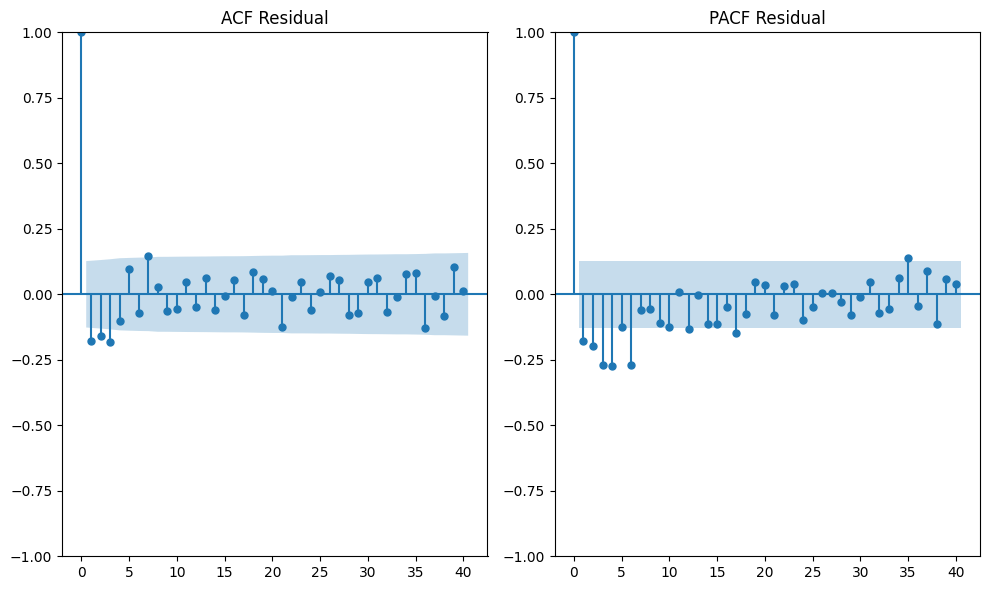

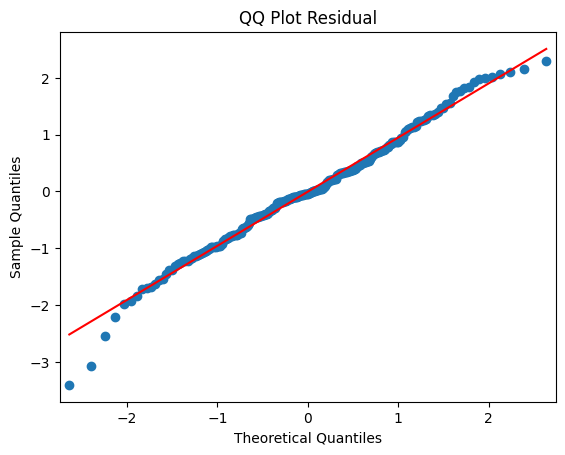

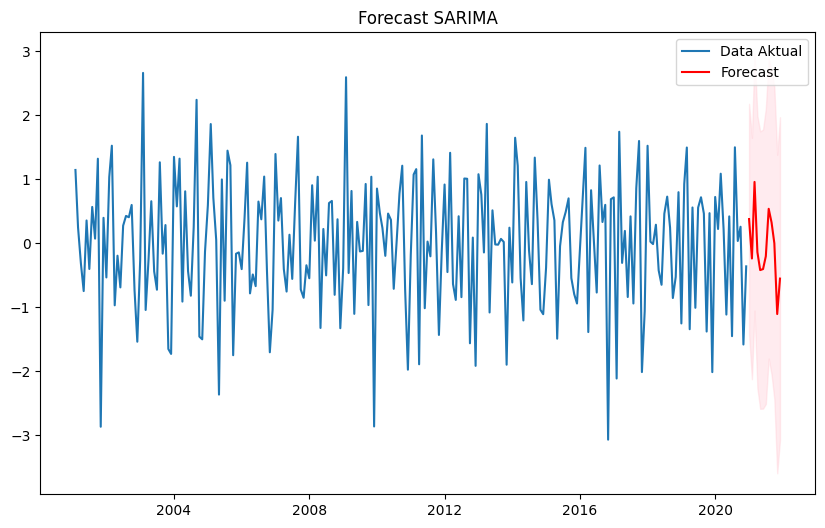

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from pmdarima import auto_arima
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# 1. Load data
data = data[data['Kota/Kabupaten'] == 'Riau']

# Convert 'Date' to datetime and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


data = data['Rata-rata Suhu (°C) - Differenced']

# 2. Otomatis pilih model SARIMA menggunakan auto_arima
sarima_model = auto_arima(data,
                          start_p=0, start_q=0,
                          max_p=3, max_q=3,
                          m=12,  # model musiman dengan periodisitas 12 (data bulanan)
                          start_P=0, start_Q=0,
                          max_P=3, max_Q=3,
                          seasonal=True,  # menyertakan komponen musiman
                          d=1,  # tingkat differencing
                          D=1,  # tingkat differencing musiman
                          trace=True,  # menampilkan proses
                          error_action='ignore',  # abaikan error
                          suppress_warnings=True,
                          stepwise=True)  # pencarian stepwise


# 3. Cetak hasil dari auto_arima
print(sarima_model.summary())

# 4. Fit model SARIMA dengan parameter dari auto_arima
order = sarima_model.order
seasonal_order = sarima_model.seasonal_order
sarima_fitted = sm.tsa.statespace.SARIMAX(data,
                                          order=order,
                                          seasonal_order=seasonal_order,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False).fit()

# 5. Evaluasi model dengan AIC
print(f"AIC: {sarima_fitted.aic}")

# 6. Lakukan Uji Ljung-Box pada residual untuk melihat apakah residual model berkorelasi
ljung_box_test = acorr_ljungbox(sarima_fitted.resid, lags=[10], return_df=True)
print(ljung_box_test)

# 7. Plot ACF dan PACF dari residual untuk melihat autokorelasi
plt.figure(figsize=(10, 6))
plt.subplot(121)
plot_acf(sarima_fitted.resid, lags=40, ax=plt.gca())
plt.title('ACF Residual')

plt.subplot(122)
plot_pacf(sarima_fitted.resid, lags=40, ax=plt.gca())
plt.title('PACF Residual')

plt.tight_layout()
plt.show()

# 8. Plot QQ plot dari residual untuk mengecek apakah residual berdistribusi normal
sm.qqplot(sarima_fitted.resid, line='s')
plt.title('QQ Plot Residual')
plt.show()

# 9. Jika residual tidak berkorelasi dan berdistribusi normal, model bisa digunakan untuk prediksi
forecast = sarima_fitted.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

# Plot prediksi
plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Data Aktual')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast SARIMA')
plt.legend()
plt.show()



In [ ]:
sarima_model = sm.tsa.statespace.SARIMAX(data,
                                         order=(3, 1, 1),  # tambahkan MA dengan q=1
                                         seasonal_order=(3, 1, 1, 12),  # tambahkan MA musiman dengan Q=1
                                         enforce_stationarity=False,
                                         enforce_invertibility=False).fit()

print(sarima_model.summary())

                                       SARIMAX Results                                       
Dep. Variable:     Rata-rata Suhu (°C) - Differenced   No. Observations:                  239
Model:                SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -200.340
Date:                               Mon, 30 Sep 2024   AIC                            418.680
Time:                                       18:01:25   BIC                            447.760
Sample:                                   02-01-2001   HQIC                           430.464
                                        - 12-01-2020                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7853      0.077    -10.144      0.000      -0.937      -0.634
ar.L2      

In [ ]:
ljung_box_test = acorr_ljungbox(sarima_model.resid, lags=[10], return_df=True)
print(ljung_box_test)


      lb_stat  lb_pvalue
10  37.448174   0.000047


In [ ]:
sarima_model = sm.tsa.statespace.SARIMAX(data,
                                         order=(1, 1, 2),  # tambahkan MA dengan q=1
                                         seasonal_order=(1, 1, 2, 12),  # tambahkan MA musiman dengan Q=1
                                         enforce_stationarity=False,
                                         enforce_invertibility=False).fit()

print(sarima_model.summary())

ljung_box_test = acorr_ljungbox(sarima_model.resid, lags=[10], return_df=True)
print(ljung_box_test)


                                       SARIMAX Results                                       
Dep. Variable:     Rata-rata Suhu (°C) - Differenced   No. Observations:                  239
Model:                SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -206.469
Date:                               Mon, 30 Sep 2024   AIC                            426.938
Time:                                       18:04:06   BIC                            449.991
Sample:                                   02-01-2001   HQIC                           436.268
                                        - 12-01-2020                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0892      0.086     -1.038      0.299      -0.258       0.079
ma.L1      

In [ ]:
sarima_model = sm.tsa.statespace.SARIMAX(data,
                                         order=(5, 1, 1),  # tambahkan MA dengan q=1
                                         seasonal_order=(5, 1, 1, 12),  # tambahkan MA musiman dengan Q=1
                                         enforce_stationarity=False,
                                         enforce_invertibility=False).fit()

print(sarima_model.summary())

ljung_box_test = acorr_ljungbox(sarima_model.resid, lags=[10], return_df=True)
print(ljung_box_test)

                                       SARIMAX Results                                       
Dep. Variable:     Rata-rata Suhu (°C) - Differenced   No. Observations:                  239
Model:                SARIMAX(5, 1, 1)x(5, 1, 1, 12)   Log Likelihood                -170.944
Date:                               Mon, 30 Sep 2024   AIC                            367.888
Time:                                       18:12:37   BIC                            407.946
Sample:                                   02-01-2001   HQIC                           384.153
                                        - 12-01-2020                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8780      0.085    -10.387      0.000      -1.044      -0.712
ar.L2      

In [ ]:
sarima_model = sm.tsa.statespace.SARIMAX(data,
                                         order=(8, 1, 1),  # tambahkan MA dengan q=1
                                         seasonal_order=(8, 1, 1, 12),  # tambahkan MA musiman dengan Q=1
                                         enforce_stationarity=False,
                                         enforce_invertibility=False).fit()

print(sarima_model.summary())

ljung_box_test = acorr_ljungbox(sarima_model.resid, lags=[10], return_df=True)
print(ljung_box_test)

                                       SARIMAX Results                                       
Dep. Variable:     Rata-rata Suhu (°C) - Differenced   No. Observations:                  239
Model:                SARIMAX(8, 1, 1)x(8, 1, 1, 12)   Log Likelihood                -116.245
Date:                               Mon, 30 Sep 2024   AIC                            270.489
Time:                                       18:23:12   BIC                            323.766
Sample:                                   02-01-2001   HQIC                           292.128
                                        - 12-01-2020                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9484      0.110     -8.658      0.000      -1.163      -0.734
ar.L2      

In [ ]:
sarima_model = sm.tsa.statespace.SARIMAX(data,
                                         order=(2, 1, 2),  # tambahkan MA dengan q=1
                                         seasonal_order=(4, 1, 1, 12),  # tambahkan MA musiman dengan Q=1
                                         enforce_stationarity=False,
                                         enforce_invertibility=False).fit()

print(sarima_model.summary())

ljung_box_test = acorr_ljungbox(sarima_model.resid, lags=[10], return_df=True)
print(ljung_box_test)

                                       SARIMAX Results                                       
Dep. Variable:     Rata-rata Suhu (°C) - Differenced   No. Observations:                  239
Model:              SARIMAX(2, 1, 2)x(4, 1, [1], 12)   Log Likelihood                -182.374
Date:                               Mon, 30 Sep 2024   AIC                            384.748
Time:                                       18:29:59   BIC                            416.453
Sample:                                   02-01-2001   HQIC                           397.608
                                        - 12-01-2020                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0719      0.096     -0.748      0.455      -0.260       0.117
ar.L2      

                                       SARIMAX Results                                       
Dep. Variable:     Rata-rata Suhu (°C) - Differenced   No. Observations:                  239
Model:               SARIMAX(8, 1, 5)x(1, 1, [], 12)   Log Likelihood                -247.956
Date:                               Mon, 30 Sep 2024   AIC                            525.912
Time:                                       18:48:10   BIC                            575.830
Sample:                                   02-01-2001   HQIC                           546.101
                                        - 12-01-2020                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.0814      0.741     -2.807      0.005      -3.535      -0.628
ar.L2      

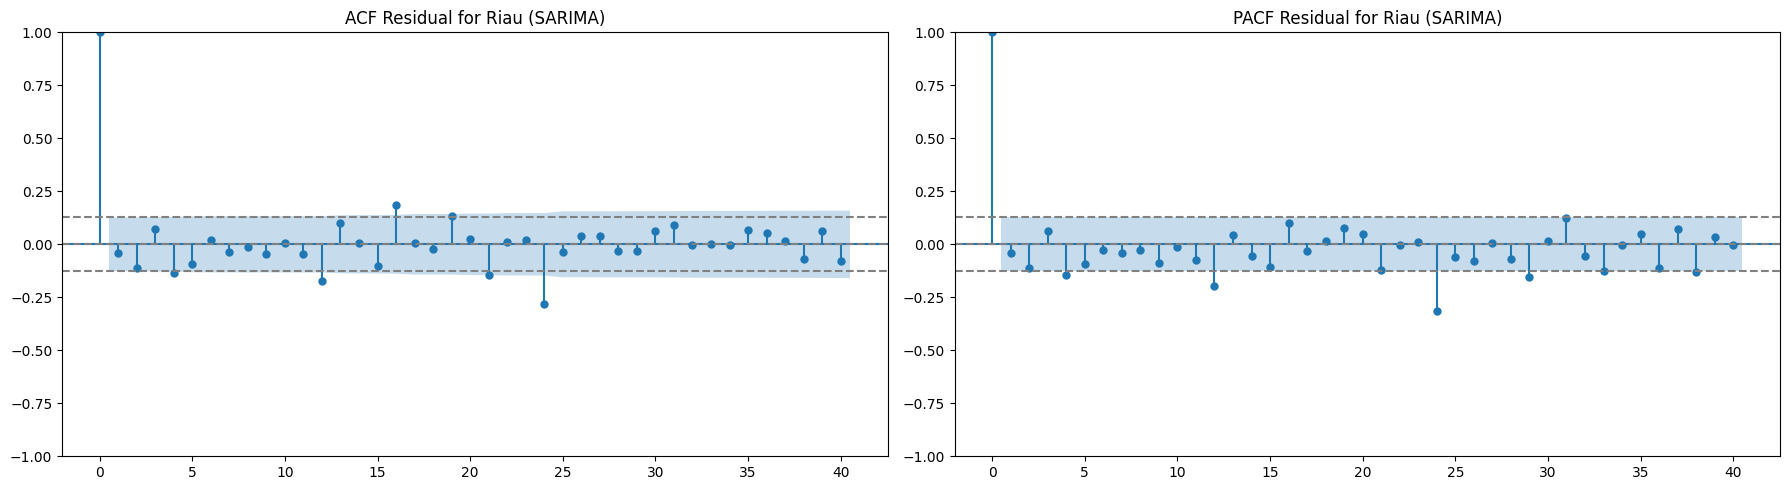

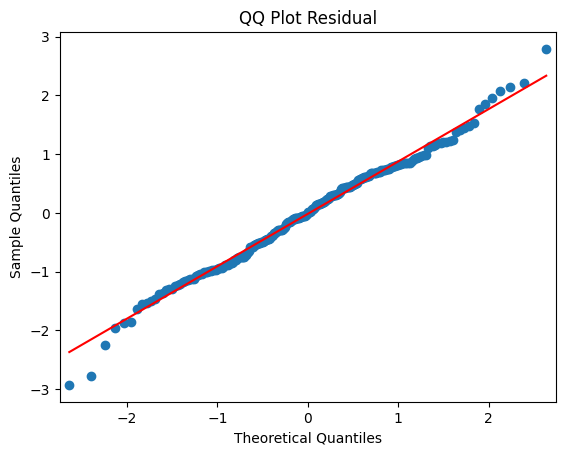

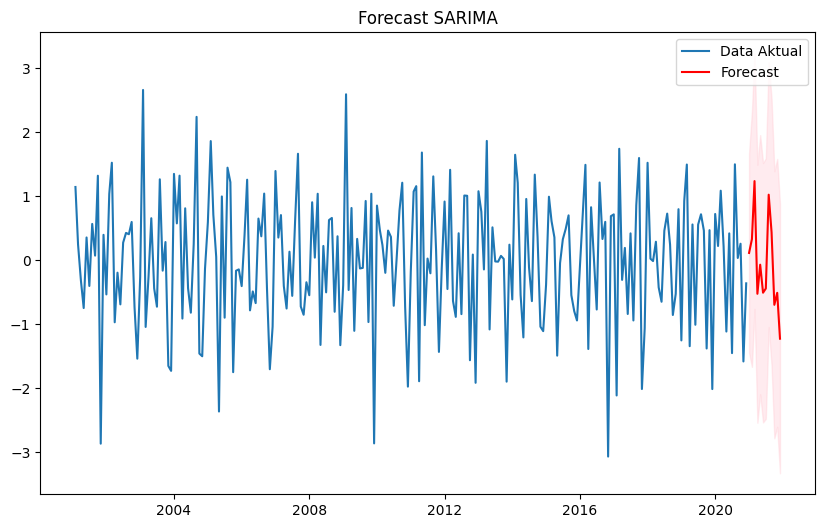

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from pmdarima import auto_arima
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx'
data = pd.read_excel(file_path)

# 1. Load data
data = data[data['Kota/Kabupaten'] == 'Riau']

# Convert 'Date' to datetime and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


data = data['Rata-rata Suhu (°C) - Differenced']

sarima_fit = sm.tsa.statespace.SARIMAX(data,
                                         order=(8, 1, 5),  # tambahkan MA dengan q=1
                                         seasonal_order=(1, 1, 0, 12),  # tambahkan MA musiman dengan Q=1
                                         enforce_stationarity=False,
                                         enforce_invertibility=False).fit()


# 3. Cetak hasil
print(sarima_fit.summary())


# 5. Evaluasi model dengan AIC
print(f"AIC: {sarima_fit.aic}")

# 6. Lakukan Uji Ljung-Box pada residual untuk melihat apakah residual model berkorelasi
ljung_box_test = acorr_ljungbox(sarima_fit.resid, lags=[10], return_df=True)
print(ljung_box_test)

# 7. Plot ACF dan PACF dari residual untuk melihat autokorelasi

fig, ax = plt.subplots(1, 2, figsize=(18, 5))

region = 'Riau'

# ACF plot
sm.graphics.tsa.plot_acf(sarima_fit.resid, lags=40, ax=ax[0])
ax[0].set_title(f'ACF Residual for {region} (SARIMA)')
ax[0].axhline(y=0, linestyle='--', color='gray')  # Dashed line at 0
ax[0].axhline(y=-1.96/np.sqrt(len(sarima_fit.resid)), linestyle='--', color='gray')
ax[0].axhline(y=1.96/np.sqrt(len(sarima_fit.resid)), linestyle='--', color='gray')

# PACF plot
sm.graphics.tsa.plot_pacf(sarima_fit.resid, lags=40, ax=ax[1])
ax[1].set_title(f'PACF Residual for {region} (SARIMA)')
ax[1].axhline(y=0, linestyle='--', color='gray')  # Dashed line at 0
ax[1].axhline(y=-1.96/np.sqrt(len(sarima_fit.resid)), linestyle='--', color='gray')
ax[1].axhline(y=1.96/np.sqrt(len(sarima_fit.resid)), linestyle='--', color='gray')

plt.tight_layout()
plt.show()

# 8. Plot QQ plot dari residual untuk mengecek apakah residual berdistribusi normal
sm.qqplot(sarima_fit.resid, line='s')
plt.title('QQ Plot Residual')
plt.show()

# 9. Jika residual tidak berkorelasi dan berdistribusi normal, model bisa digunakan untuk prediksi
forecast = sarima_fit.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

# Plot prediksi
plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Data Aktual')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast SARIMA')
plt.legend()
plt.show()



In [ ]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.3 MB/s eta 0:00:00
